In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv("AID746AID1284red_train.csv.zip")
df2=pd.read_csv("AID746AID1284red_test.csv.zip")

In [4]:
df1.shape

(47828, 155)

In [5]:
df2.shape

(11956, 155)

In [6]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)

In [7]:
df.head()

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.88329,4.126,28.68,1,0,0,194.237,1,0,Active
1,0,0,0,0,0,0,0,0,0,0,...,3.75475,1.705,88.38,4,2,1,248.307,0,0,Active
2,0,0,0,0,0,0,0,0,0,0,...,3.54156,2.520,158.80,11,7,2,404.448,0,0,Active
3,0,0,0,0,0,0,0,0,0,0,...,3.61641,3.363,87.74,9,7,2,409.486,0,0,Active
4,0,0,0,0,0,0,0,0,0,0,...,3.58817,1.706,115.43,12,10,2,485.537,0,0,Active


In [8]:
df.tail()

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
59779,0,0,0,0,0,0,0,0,0,0,...,3.56836,1.871,56.13,3,5,2,269.328,1,1,Inactive
59780,0,0,0,0,0,0,0,0,0,0,...,3.68896,3.934,102.10,6,6,1,434.448,0,1,Inactive
59781,0,0,0,0,0,0,0,0,0,0,...,3.50393,1.594,44.70,0,4,1,215.256,1,0,Inactive
59782,0,0,0,0,0,0,0,0,0,0,...,3.87634,4.096,58.89,3,4,1,267.284,1,1,Inactive
59783,0,0,0,0,0,0,0,0,0,0,...,3.52580,2.269,93.73,5,7,2,340.335,0,1,Inactive


In [9]:
df.shape

(59784, 155)

In [10]:
numeric_columns=df.describe().columns
numeric_columns

Index(['NEG_01_NEG', 'NEG_02_NEG', 'NEG_03_NEG', 'NEG_04_NEG', 'NEG_05_NEG',
       'NEG_06_NEG', 'NEG_07_NEG', 'NEG_03_POS', 'NEG_04_POS', 'NEG_05_POS',
       ...
       'WBN_LP_L_1.00', 'WBN_LP_H_1.00', 'XLogP', 'PSA', 'NumRot', 'NumHBA',
       'NumHBD', 'MW', 'BBB', 'BadGroup'],
      dtype='object', length=154)

In [11]:
categorical_columns=df.describe(include="O").columns
categorical_columns

Index(['Outcome'], dtype='object')

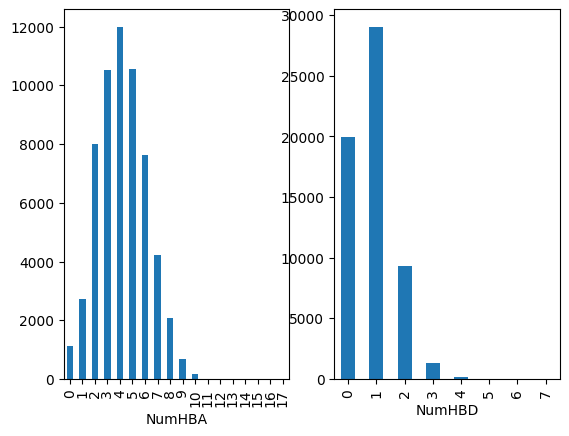

In [12]:
a = [df["NumHBA"], df["NumHBD"]]
for i, col in enumerate(a):
    plt.subplot(1, 2,i+1)
    df.groupby(col).size().plot(kind="bar")
plt.show()

In [13]:
df.isnull().sum()

NEG_01_NEG    0
NEG_02_NEG    0
NEG_03_NEG    0
NEG_04_NEG    0
NEG_05_NEG    0
             ..
NumHBD        0
MW            0
BBB           0
BadGroup      0
Outcome       0
Length: 155, dtype: int64

In [14]:
df["Outcome"].value_counts()

Outcome
Inactive    59727
Active         57
Name: count, dtype: int64

In [15]:
X1=df.drop(["Outcome"],axis=1)

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\2755860041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PSA"])


<Axes: xlabel='PSA', ylabel='Density'>

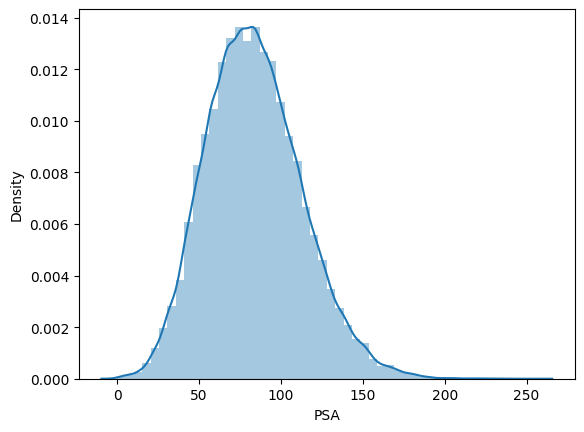

In [16]:
sns.distplot(df["PSA"])

In [17]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [18]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_sample,y_sample=smote.fit_resample(X,y)

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1081136136.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_sample["PSA"])


<Axes: xlabel='PSA', ylabel='Density'>

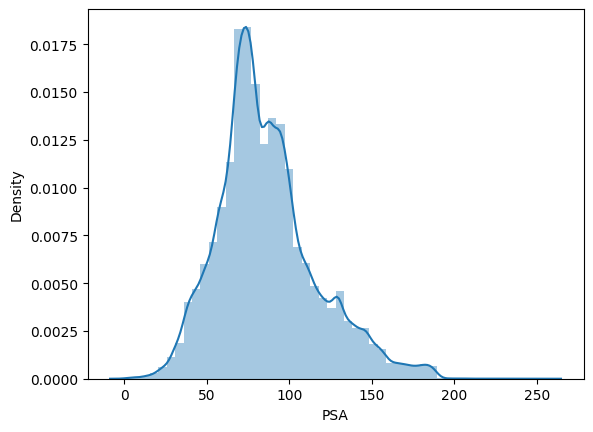

In [19]:
sns.distplot(X_sample["PSA"])

In [20]:
X_sample.describe()

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_L_1.00,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup
count,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,...,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000,119454.000000
mean,0.000201,0.001917,0.000134,0.000636,0.000276,0.000176,0.000117,0.000260,0.000779,0.000301,...,-3.297188,3.709109,2.542820,86.343605,5.438051,4.357175,0.878932,346.929530,0.233998,0.112478
std,0.014173,0.043742,0.011573,0.025216,0.016619,0.013258,0.010825,0.016107,0.027892,0.017358,...,0.251602,0.202279,1.099044,30.118902,2.509859,1.816677,0.727269,71.833179,0.423373,0.349063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.882950,1.961380,-3.366000,0.000000,0.000000,0.000000,0.000000,122.131000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.540857,3.580340,1.860000,67.200000,4.000000,3.000000,0.000000,289.379000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.251365,3.687395,2.623000,81.500000,6.000000,4.000000,1.000000,351.237000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.090884,3.864224,3.180176,101.167783,7.000000,6.000000,1.000000,404.797629,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-2.042500,4.457050,8.314000,255.980000,20.000000,17.000000,7.000000,914.186000,1.000000,4.000000


In [21]:
df.describe()

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_L_1.00,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup
count,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,...,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000,59784.000000
mean,0.000401,0.003830,0.000268,0.001271,0.000552,0.000351,0.000234,0.000519,0.001556,0.000602,...,-3.270865,3.684774,2.660818,83.647321,5.526830,4.204035,0.874883,345.633723,0.296752,0.192995
std,0.020032,0.061773,0.016357,0.035632,0.023488,0.018739,0.015301,0.022766,0.039411,0.024532,...,0.269131,0.234122,1.318811,29.072753,2.500613,1.919055,0.769096,72.816645,0.456830,0.446926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.882950,1.961380,-3.366000,0.000000,0.000000,0.000000,0.000000,122.131000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.547810,3.536520,1.803000,63.050000,4.000000,3.000000,0.000000,292.423000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.207370,3.670090,2.672000,82.010000,5.000000,4.000000,1.000000,343.471000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.041575,3.854423,3.533000,102.230000,7.000000,5.000000,1.000000,398.816000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-2.042500,4.457050,8.314000,255.980000,20.000000,17.000000,7.000000,914.186000,1.000000,4.000000


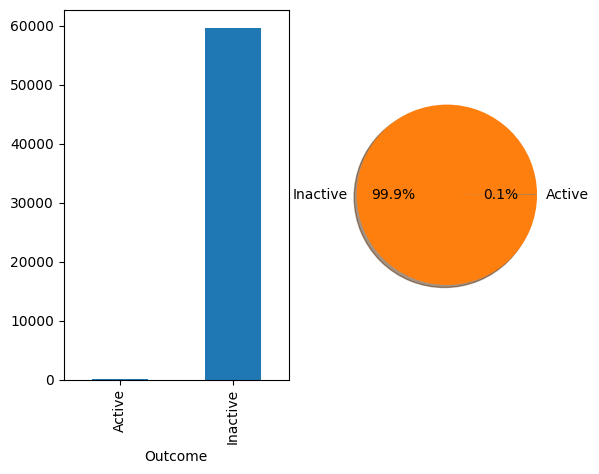

In [22]:
plt.subplot(121)
df.groupby("Outcome").size().plot(kind="bar")
plt.subplot(122)
df.groupby("Outcome").size().plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.show()

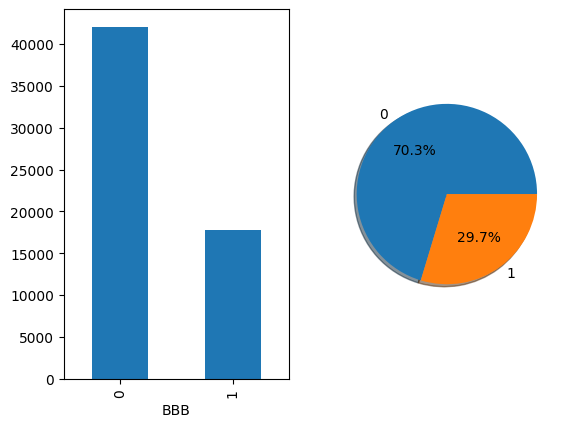

In [23]:
plt.subplot(121)
df.groupby("BBB").size().plot(kind="bar")
plt.subplot(122)
df.groupby("BBB").size().plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.show()

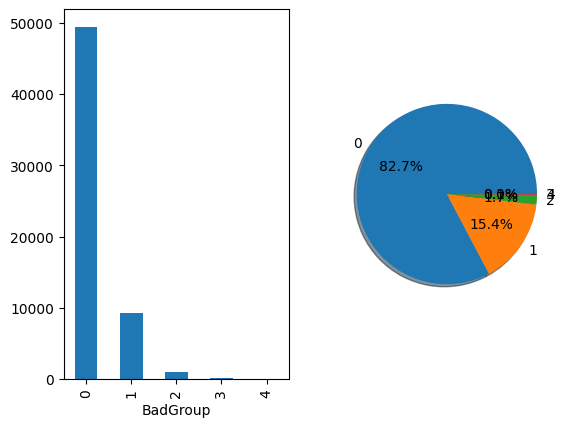

In [24]:
plt.subplot(121)
df.groupby("BadGroup").size().plot(kind="bar")
plt.subplot(122)
df.groupby("BadGroup").size().plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.show()

In [25]:
df.dtypes

NEG_01_NEG      int64
NEG_02_NEG      int64
NEG_03_NEG      int64
NEG_04_NEG      int64
NEG_05_NEG      int64
               ...   
NumHBD          int64
MW            float64
BBB             int64
BadGroup        int64
Outcome        object
Length: 155, dtype: object

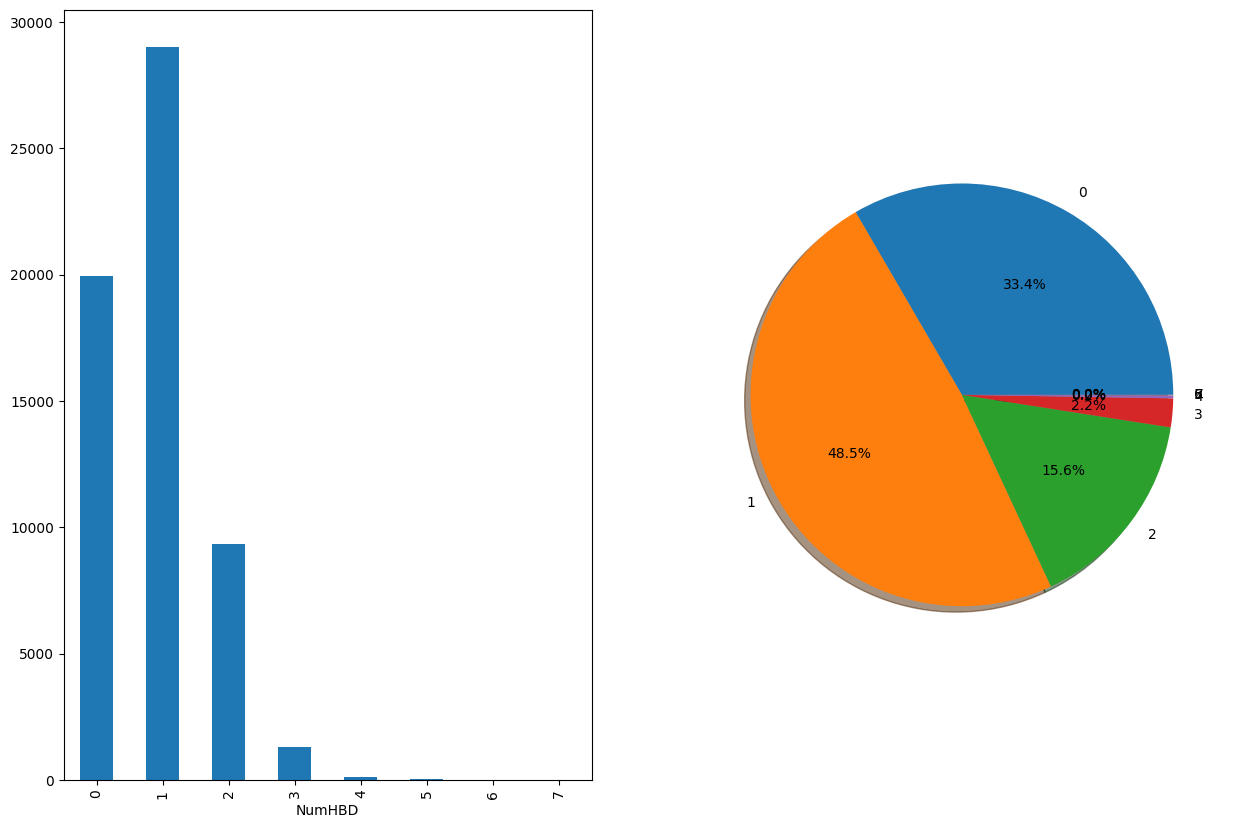

In [26]:
plt.subplot(121)
df.groupby("NumHBD").size().plot(kind="bar")
plt.subplot(122)
df.groupby("NumHBD").size().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(15,10))
plt.show()

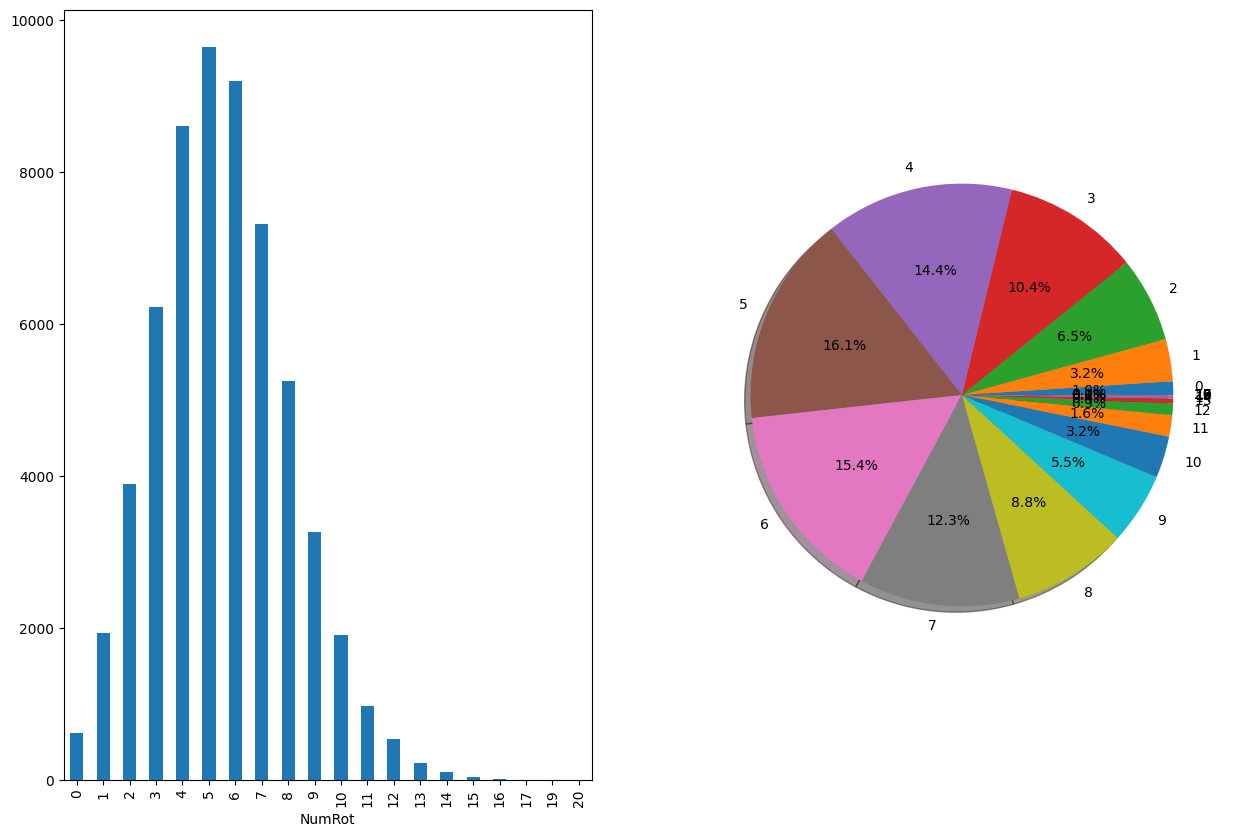

In [27]:
plt.subplot(121)
df.groupby("NumRot").size().plot(kind="bar")
plt.subplot(122)
df.groupby("NumRot").size().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(15,10))
plt.show()

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


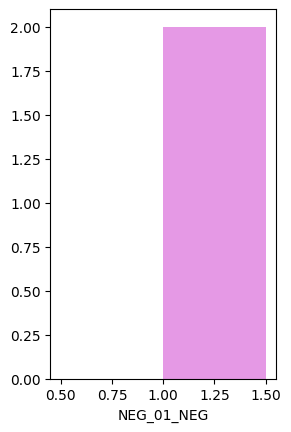

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


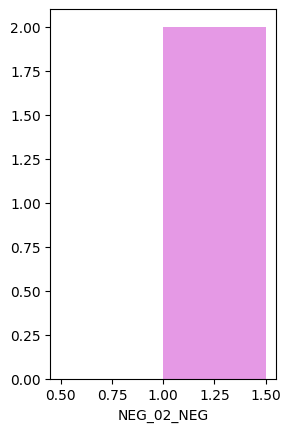

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


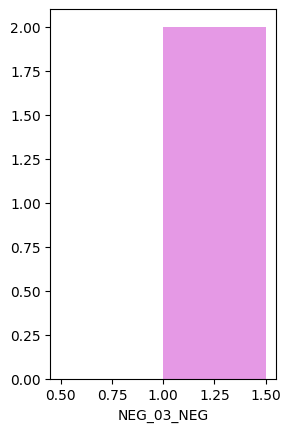

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


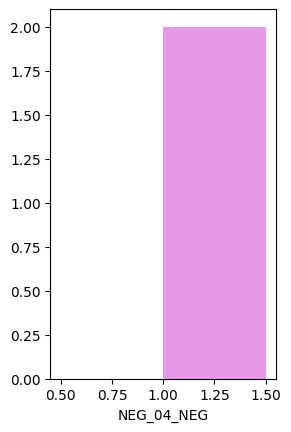

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


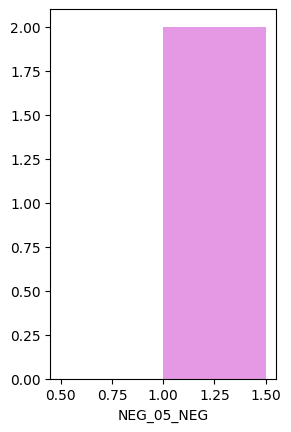

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


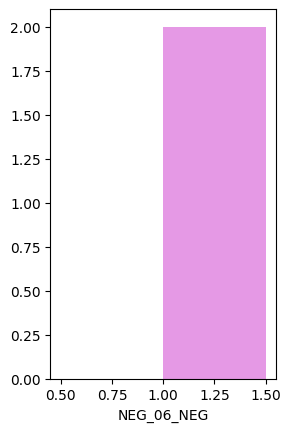

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


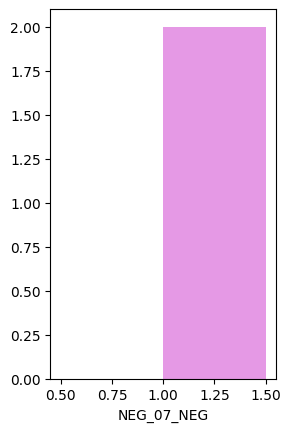

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


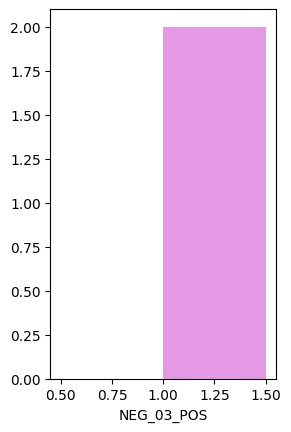

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


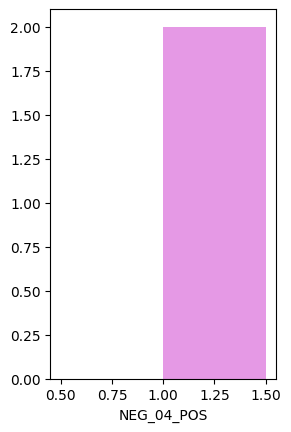

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


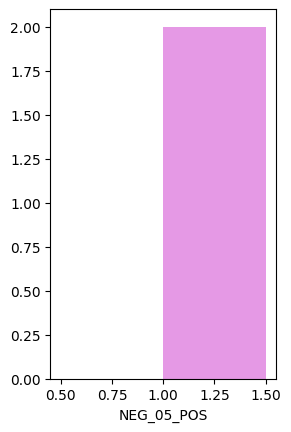

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


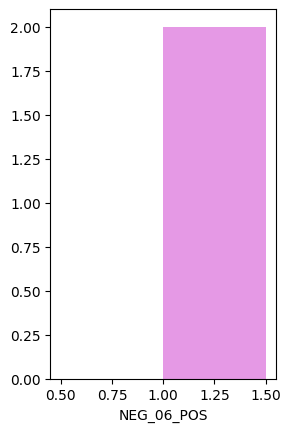

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


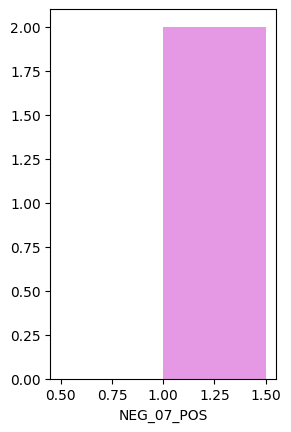

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


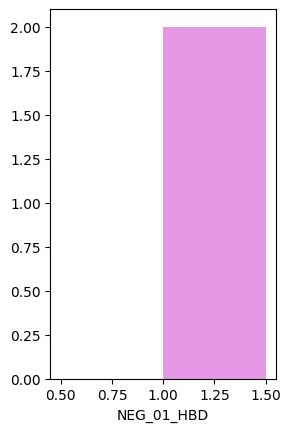

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


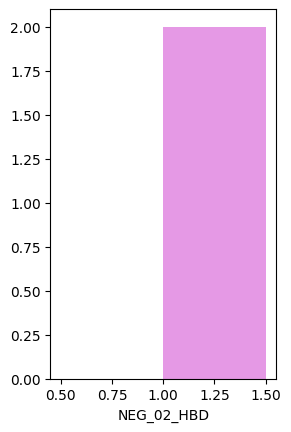

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


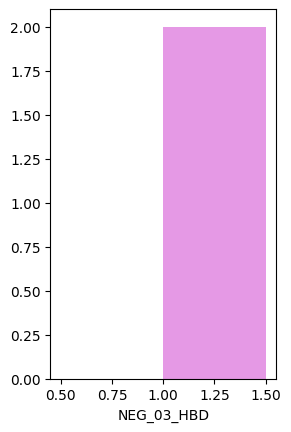

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


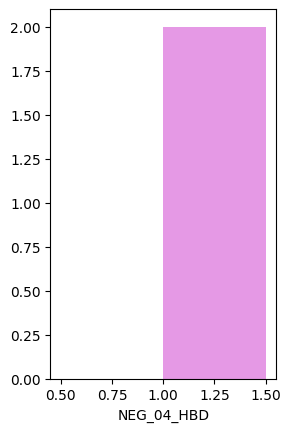

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


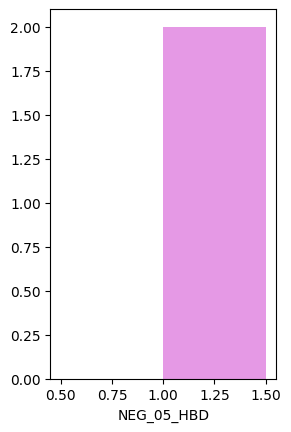

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


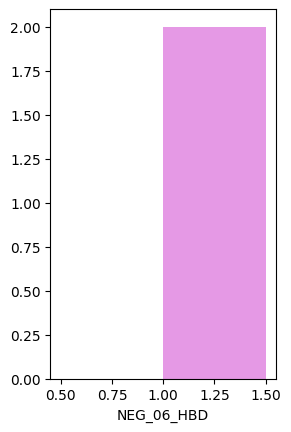

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


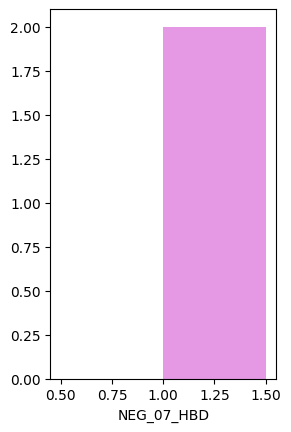

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


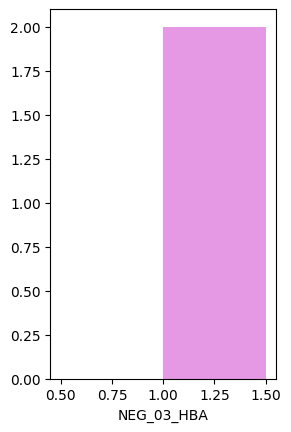

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


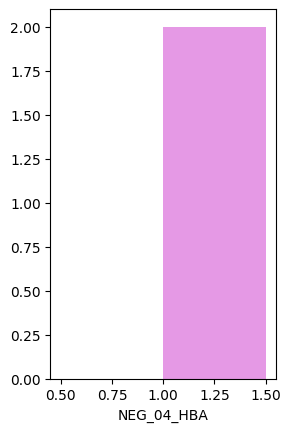

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


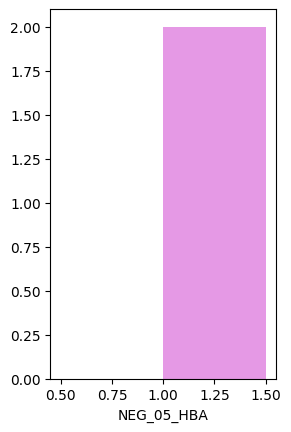

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


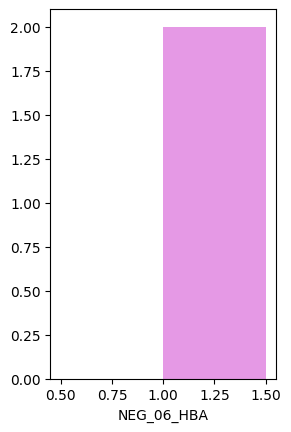

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


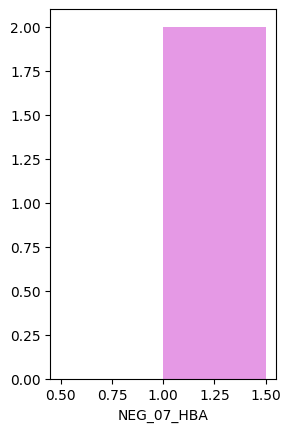

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


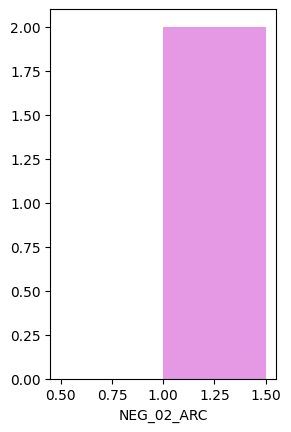

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


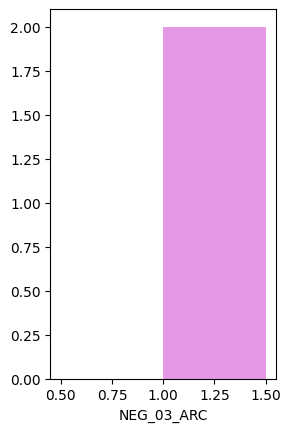

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


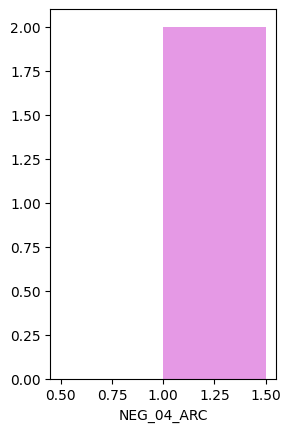

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


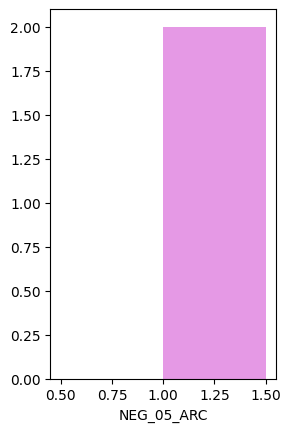

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


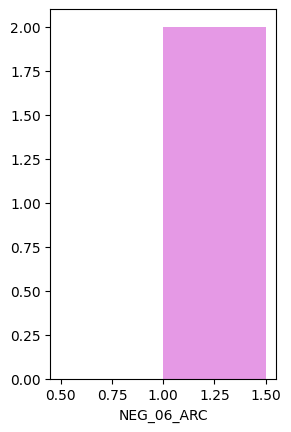

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


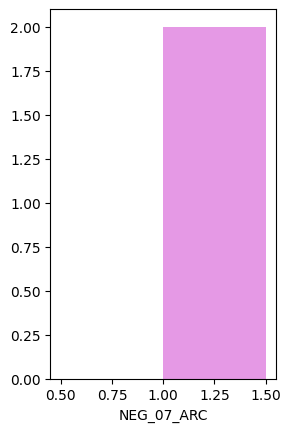

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


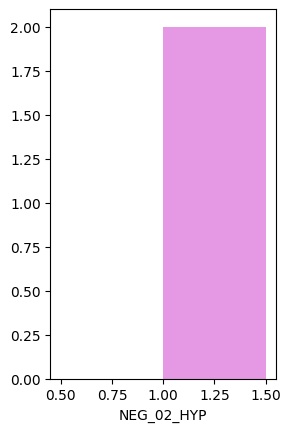

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


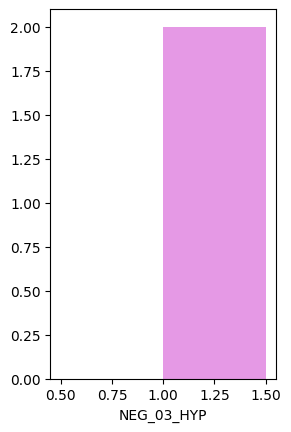

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


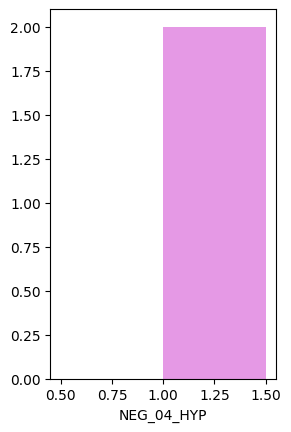

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


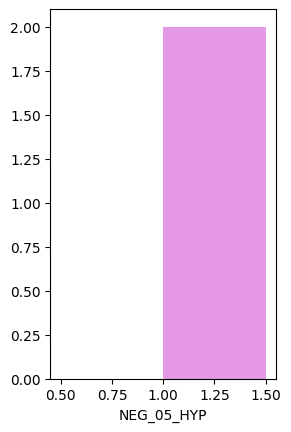

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


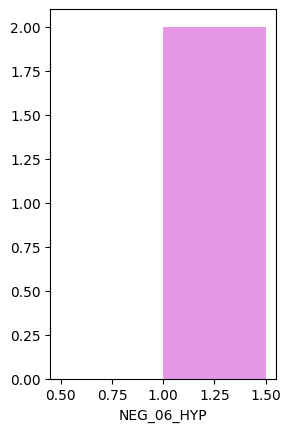

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


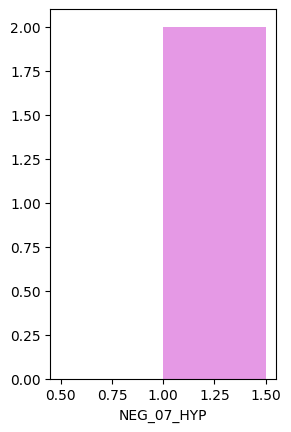

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


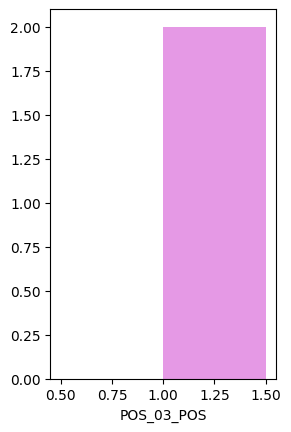

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


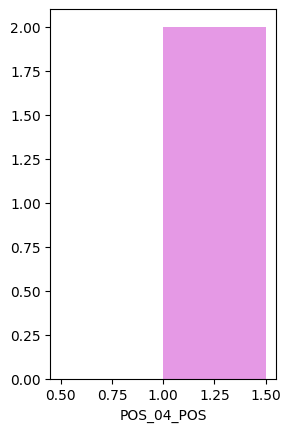

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


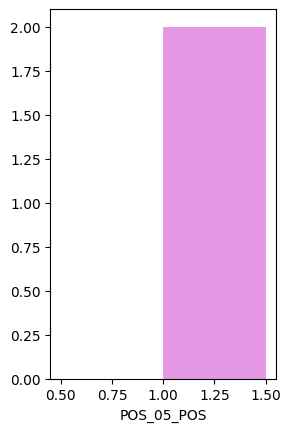

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


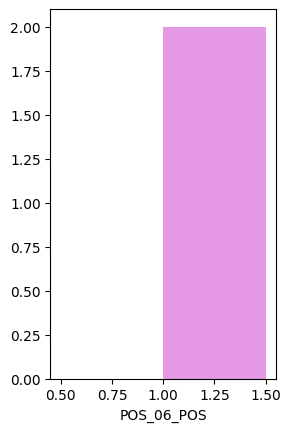

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


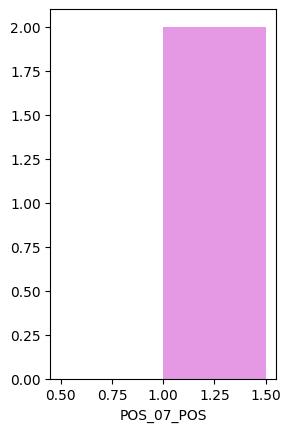

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


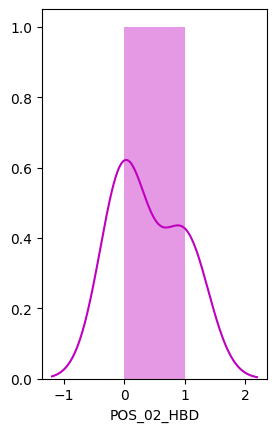

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


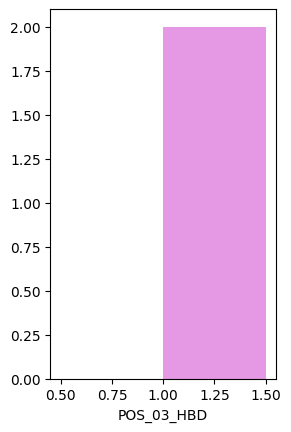

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


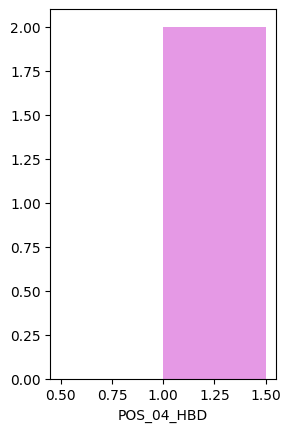

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


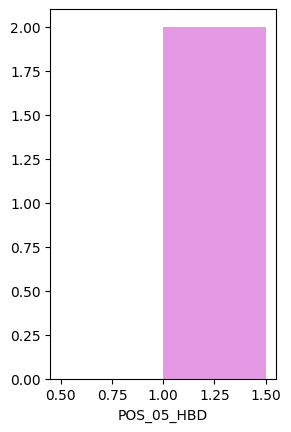

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


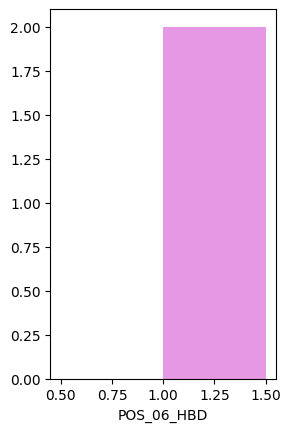

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


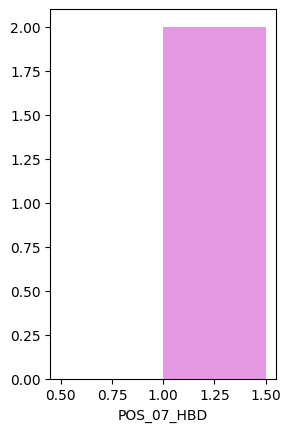

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


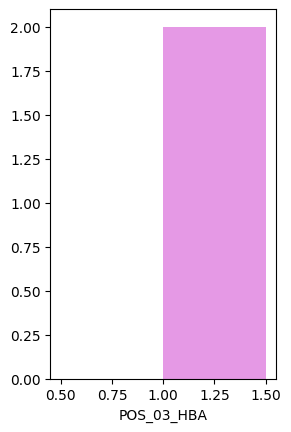

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


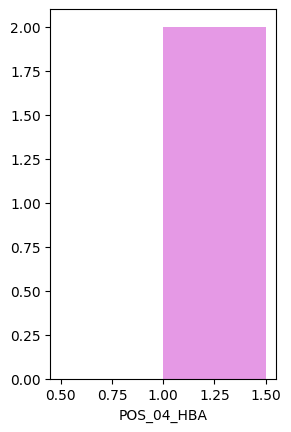

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


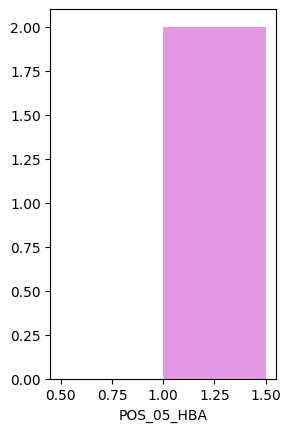

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


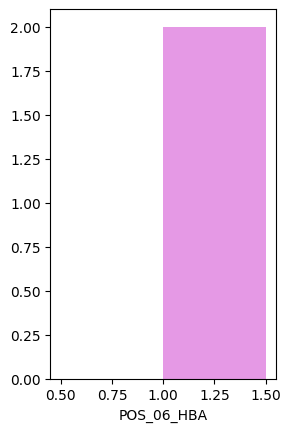

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


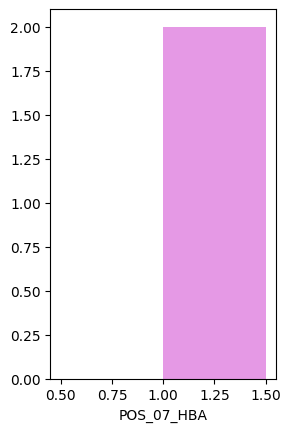

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


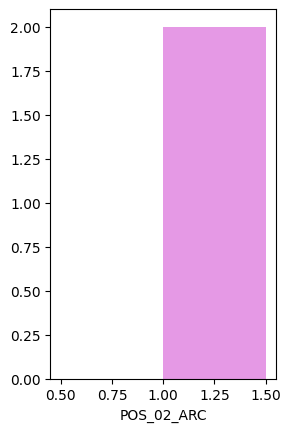

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


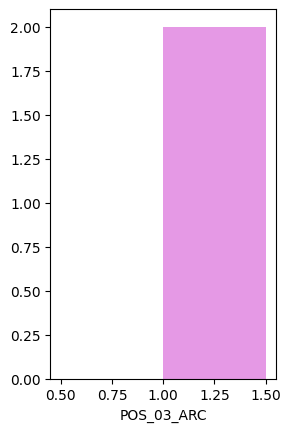

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


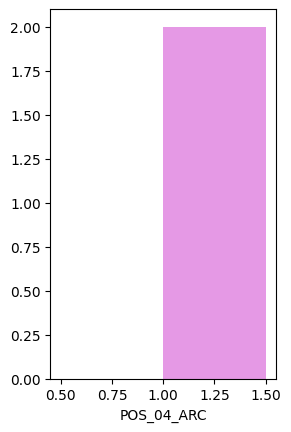

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


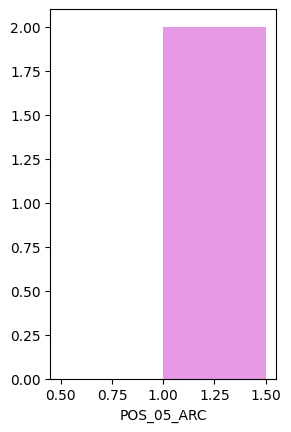

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


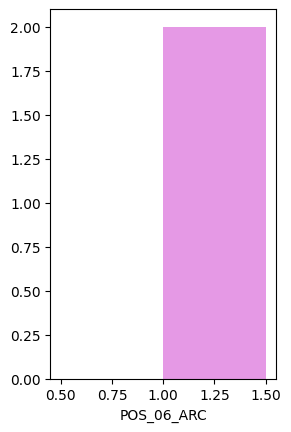

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


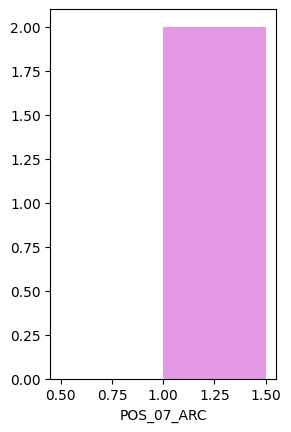

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


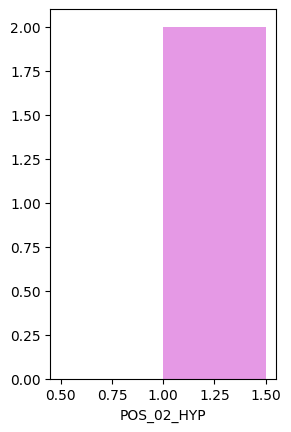

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


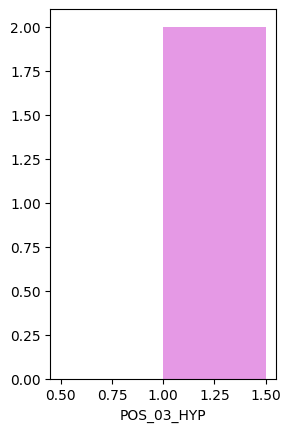

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


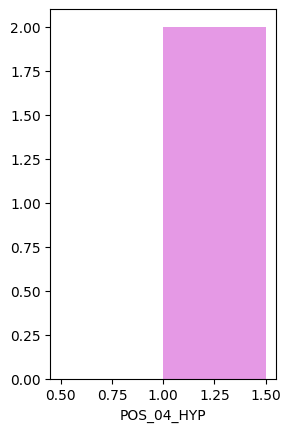

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


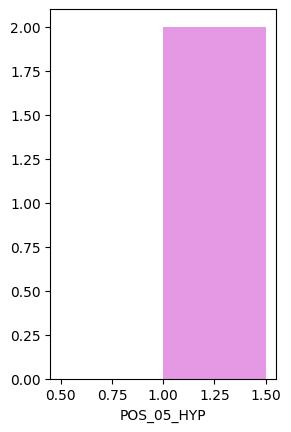

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


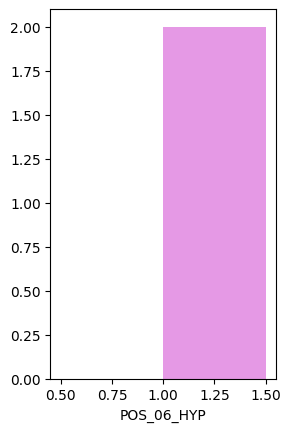

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


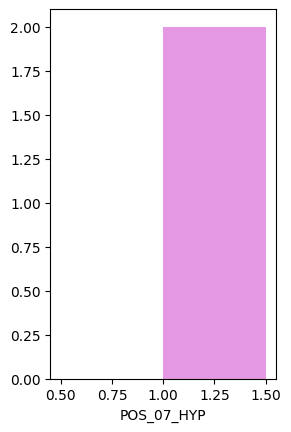

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


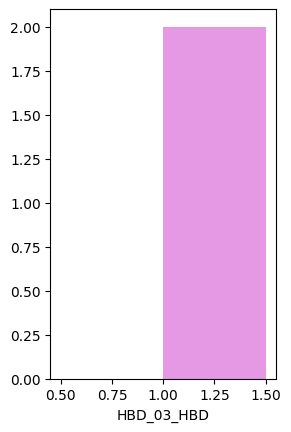

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


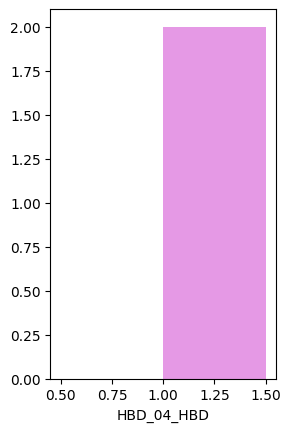

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


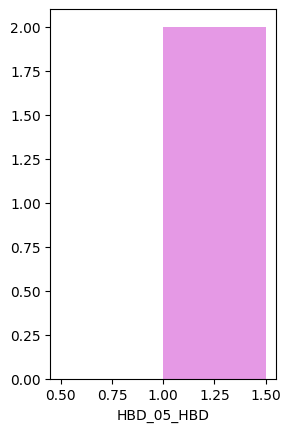

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


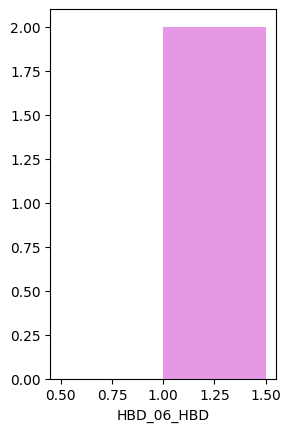

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


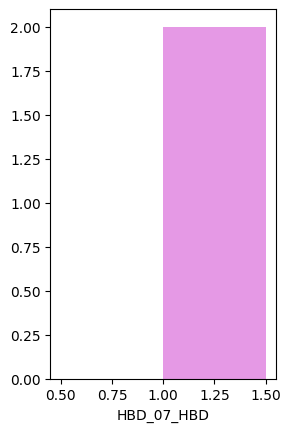

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


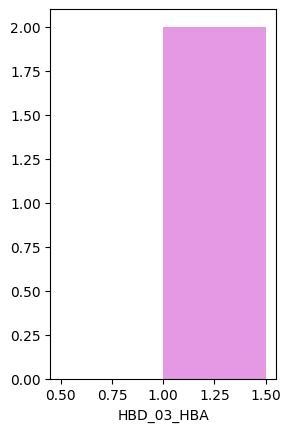

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


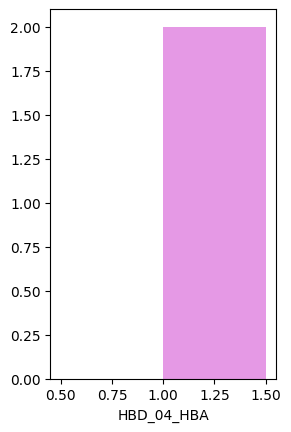

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


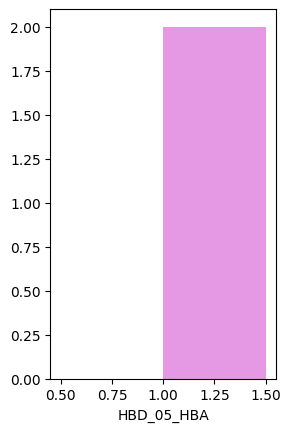

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


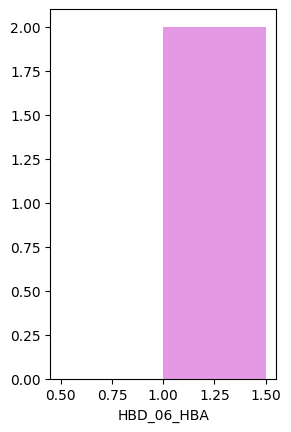

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


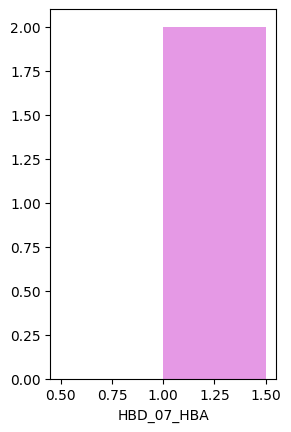

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


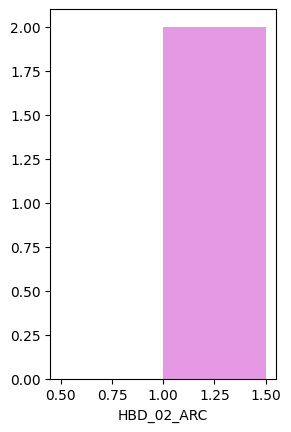

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


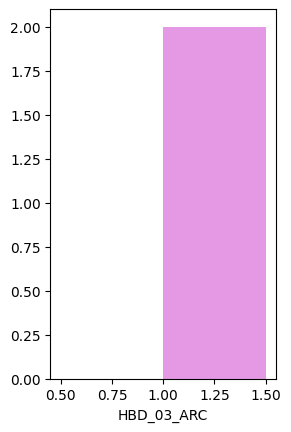

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


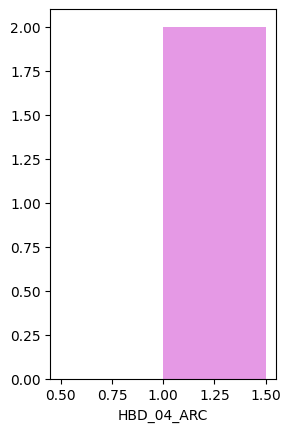

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


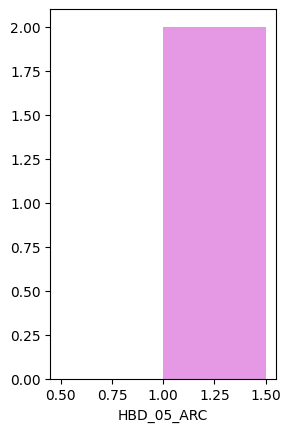

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


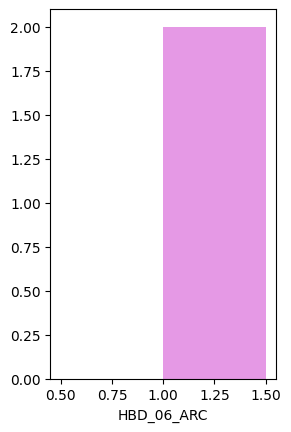

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


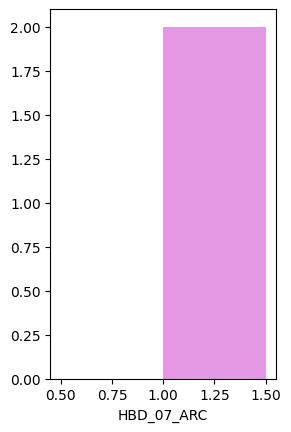

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


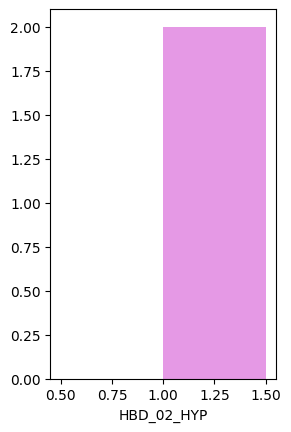

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


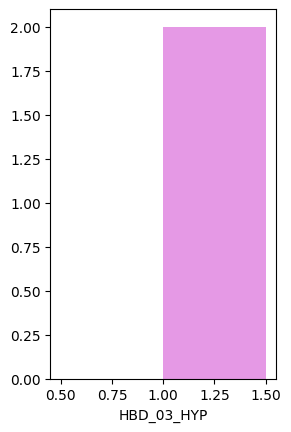

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


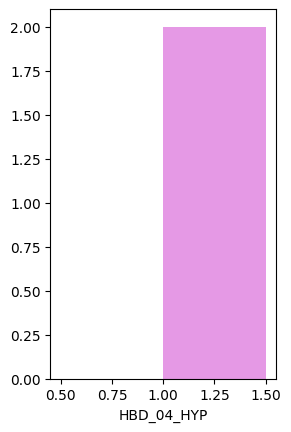

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


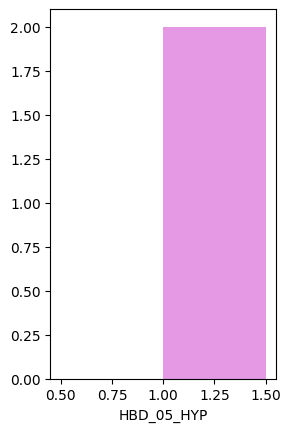

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


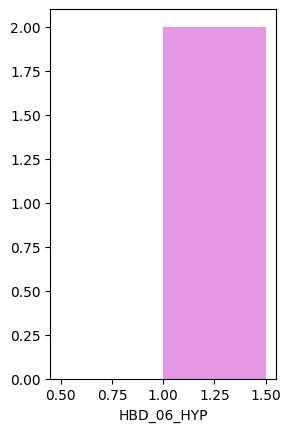

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


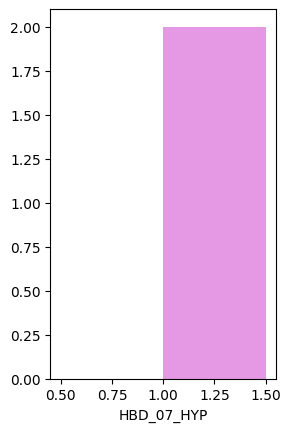

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


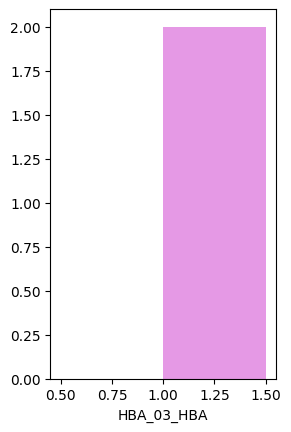

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


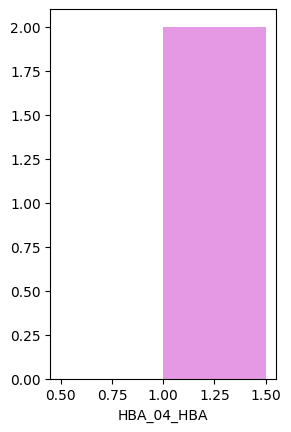

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


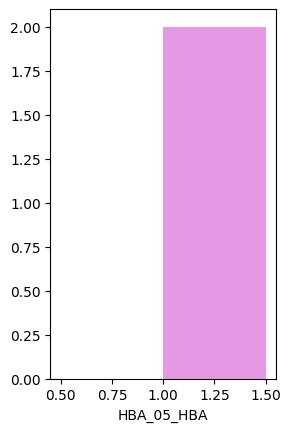

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


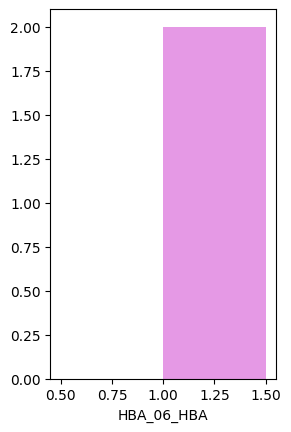

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


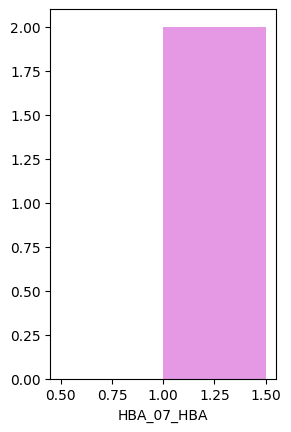

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


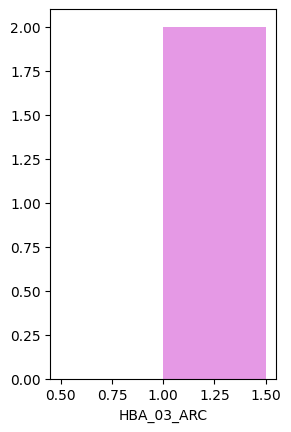

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


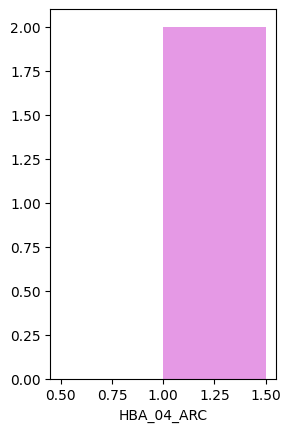

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


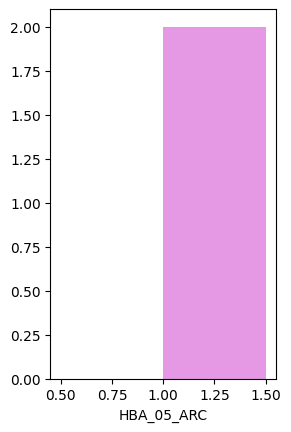

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


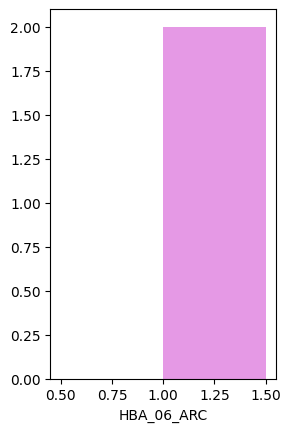

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


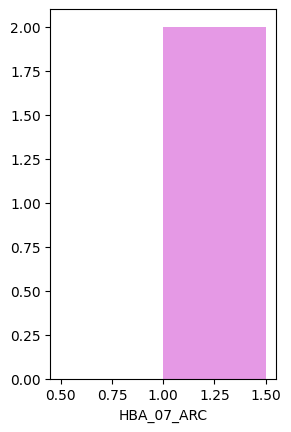

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


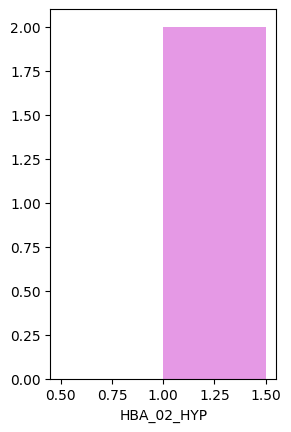

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


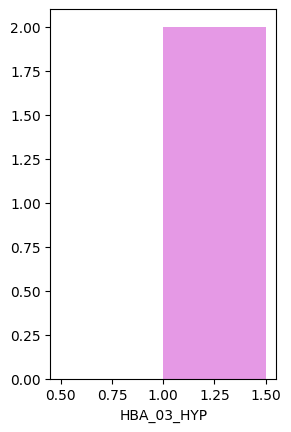

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


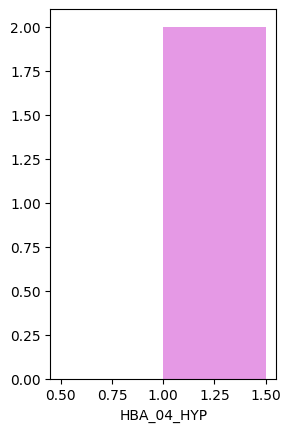

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


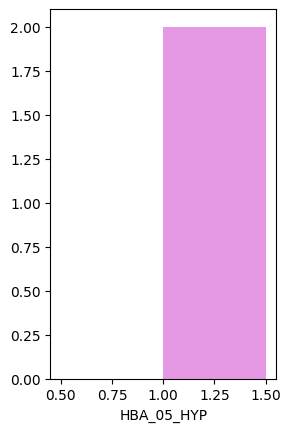

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


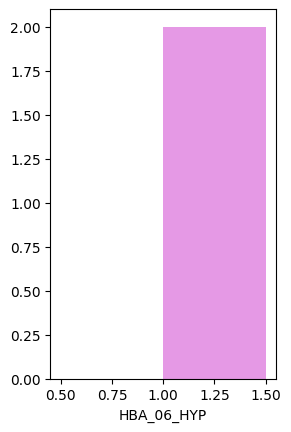

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


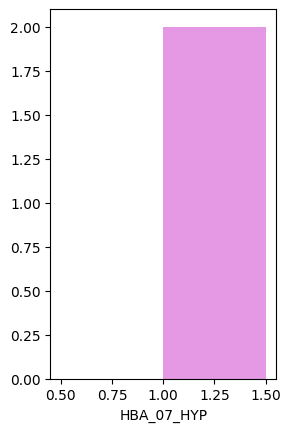

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


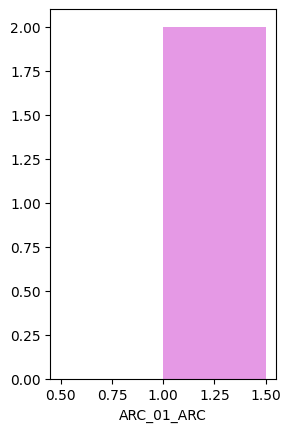

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


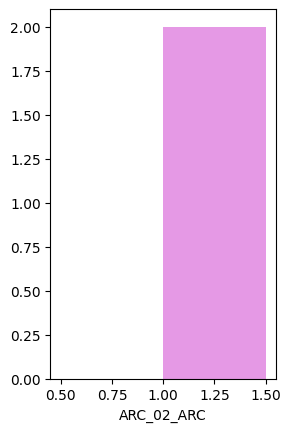

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


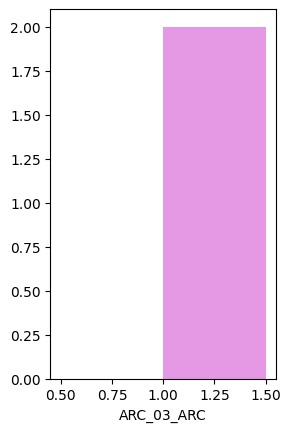

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


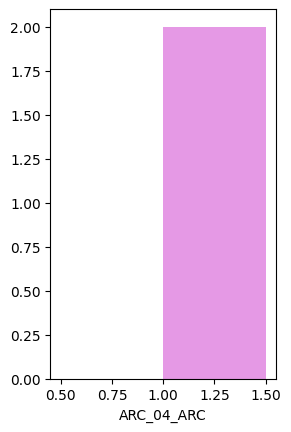

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


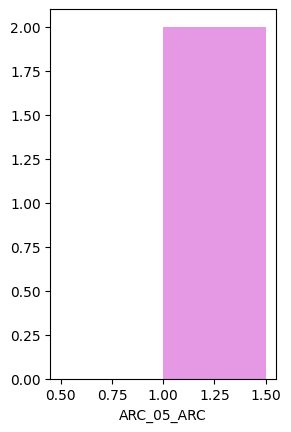

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


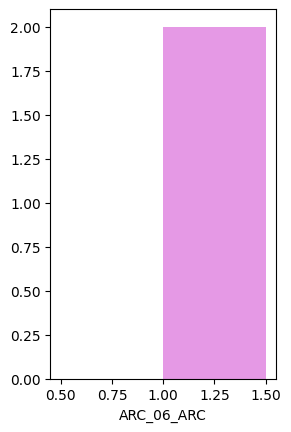

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


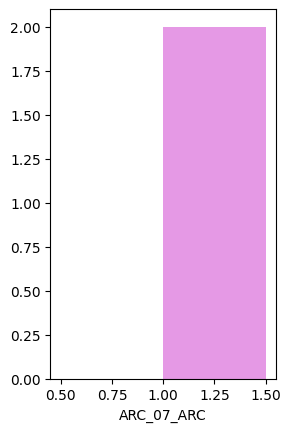

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


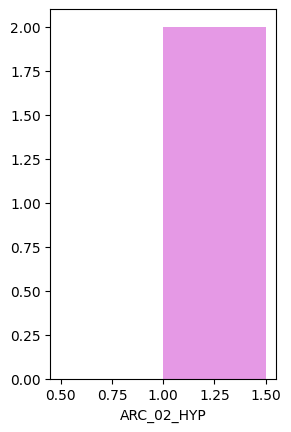

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


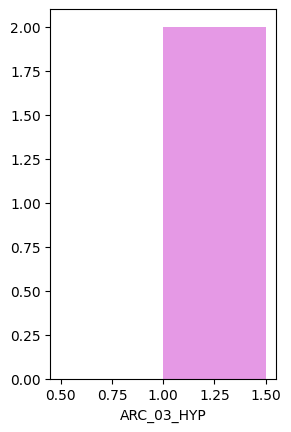

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


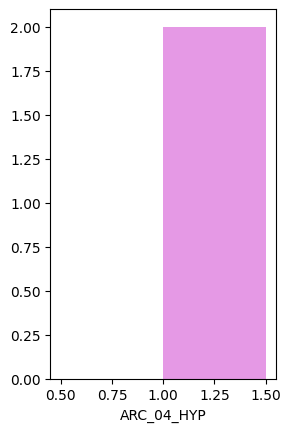

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


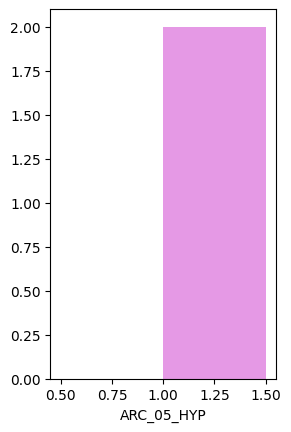

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


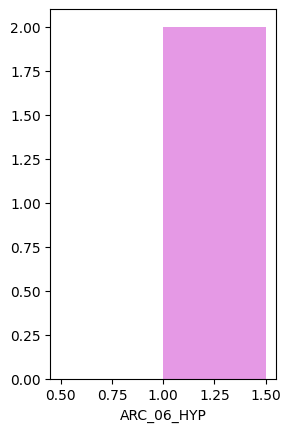

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


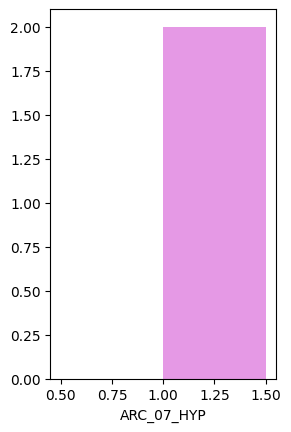

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


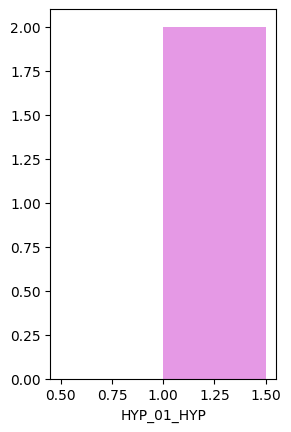

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


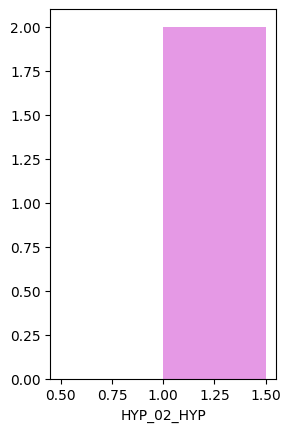

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


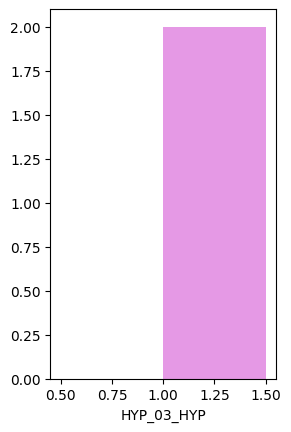

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


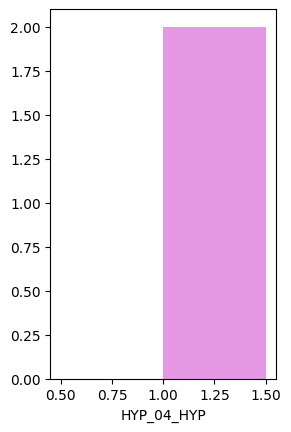

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


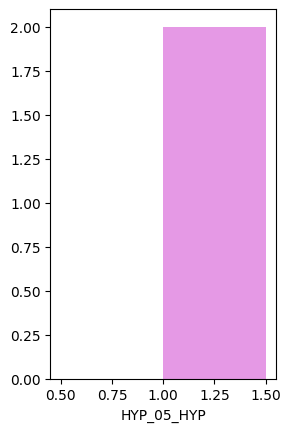

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


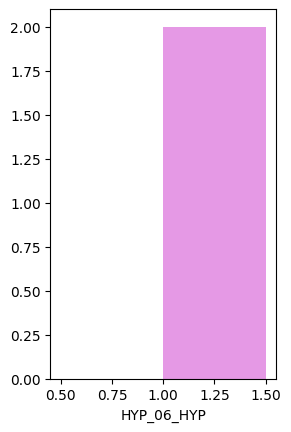

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


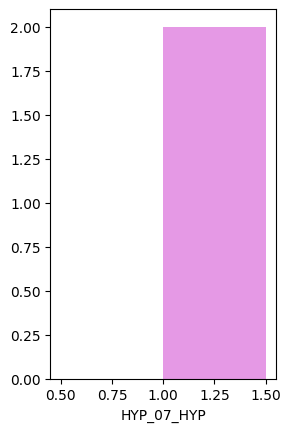

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


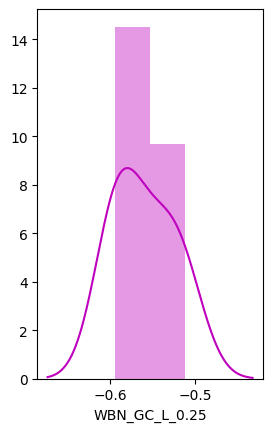

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


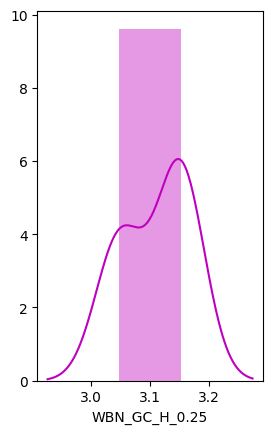

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


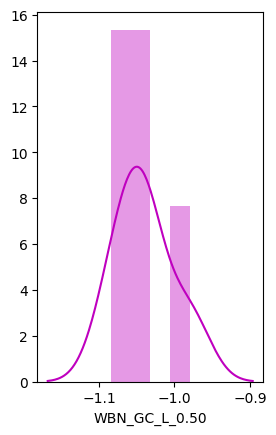

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


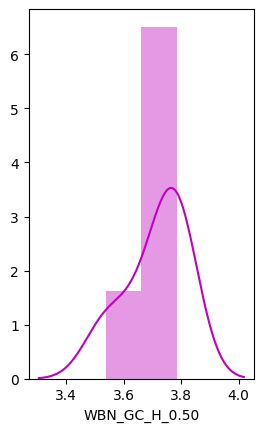

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


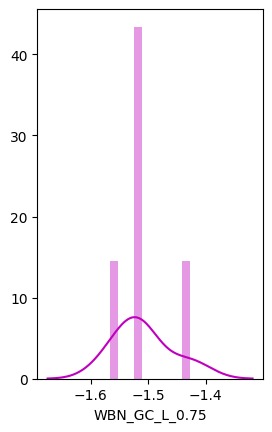

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


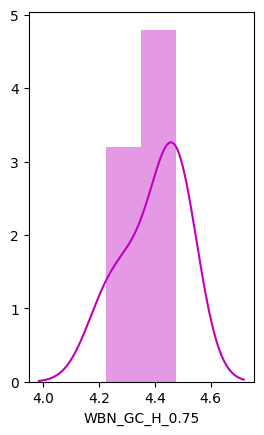

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


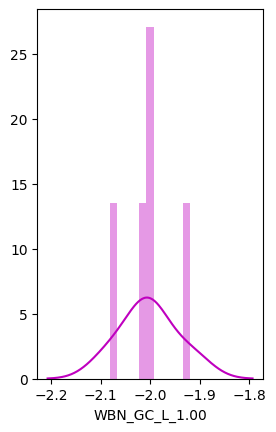

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


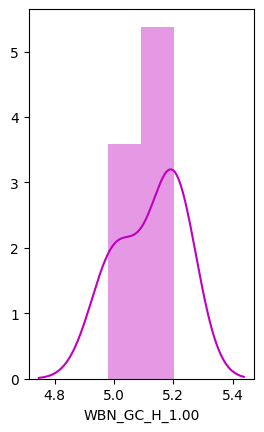

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


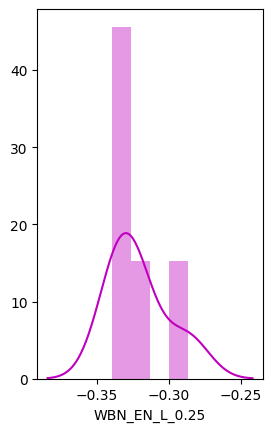

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


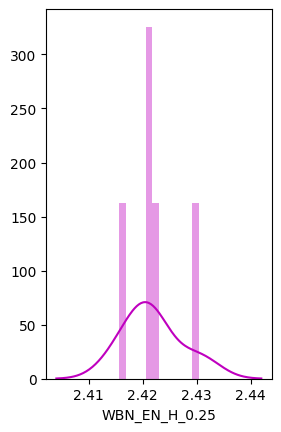

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


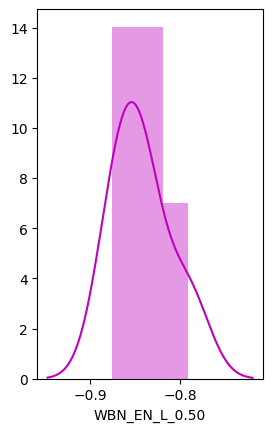

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


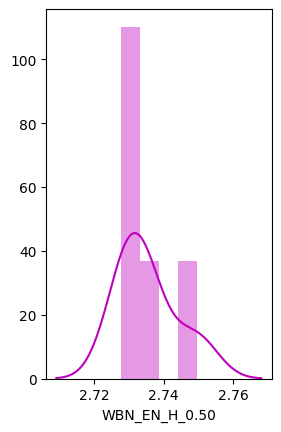

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


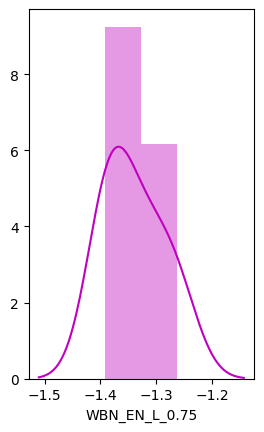

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


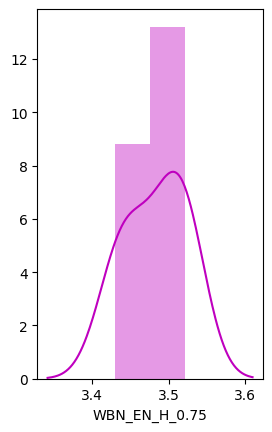

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


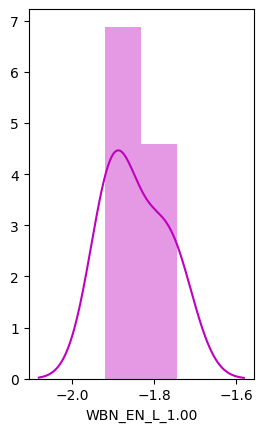

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


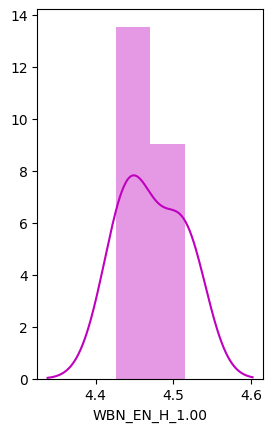

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


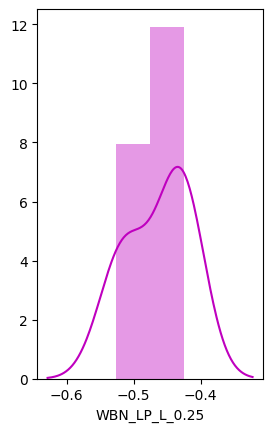

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


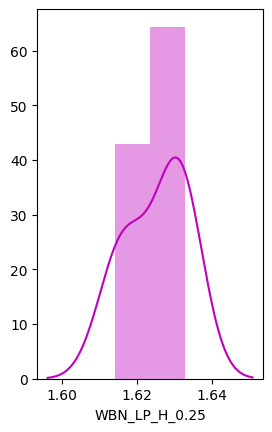

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


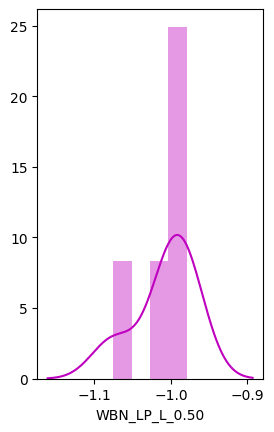

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


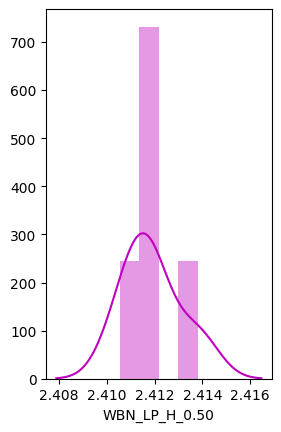

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


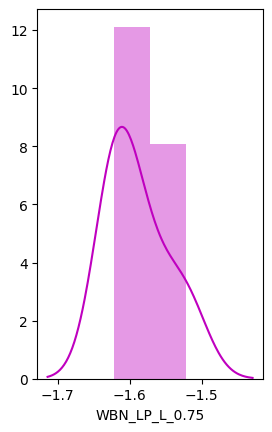

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


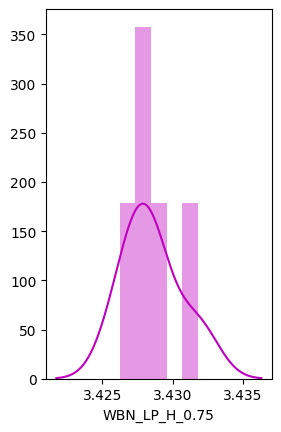

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


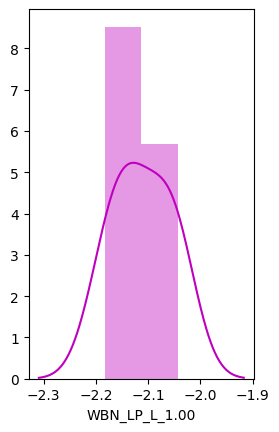

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


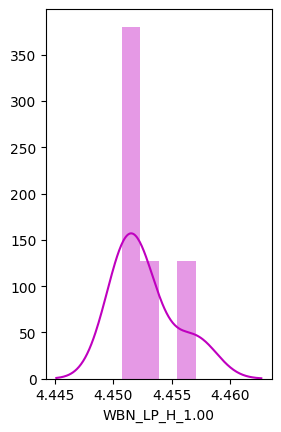

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


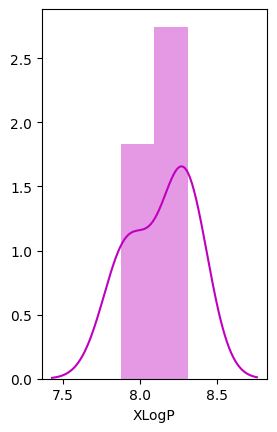

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


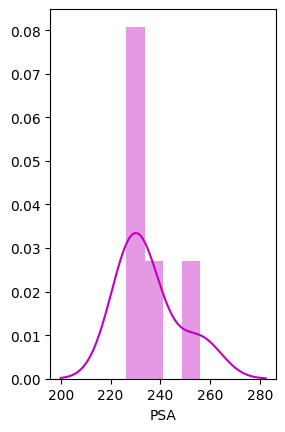

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


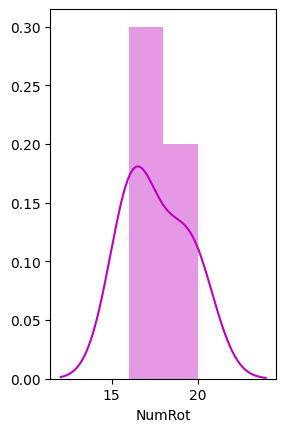

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


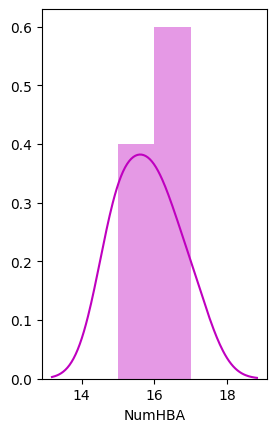

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


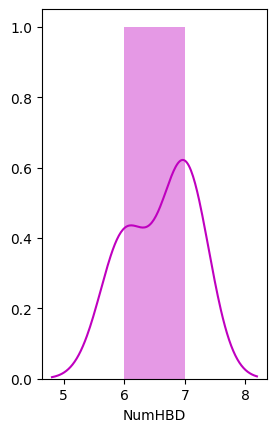

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")


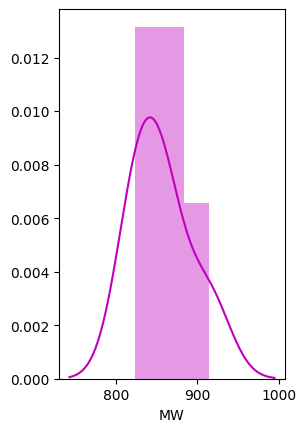

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


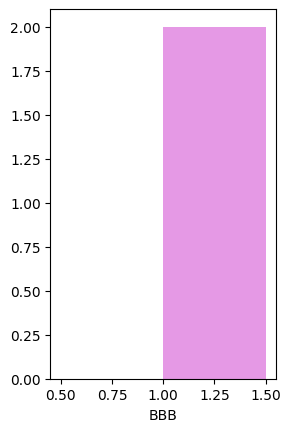

C:\Users\niles\AppData\Local\Temp\ipykernel_23264\1839633835.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
C:\Bioassay_end_to_end_project\venv\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


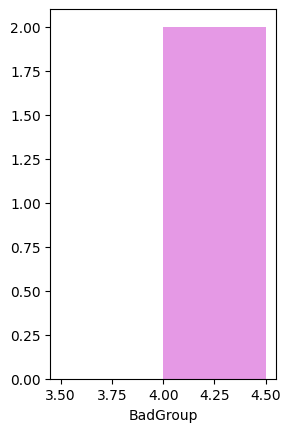

In [28]:
#Box plot with distplot 
numeric_features =df.describe().columns
numeric_features

for var in numeric_features:
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].sort_values(ascending=False)[:5],color="m")
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

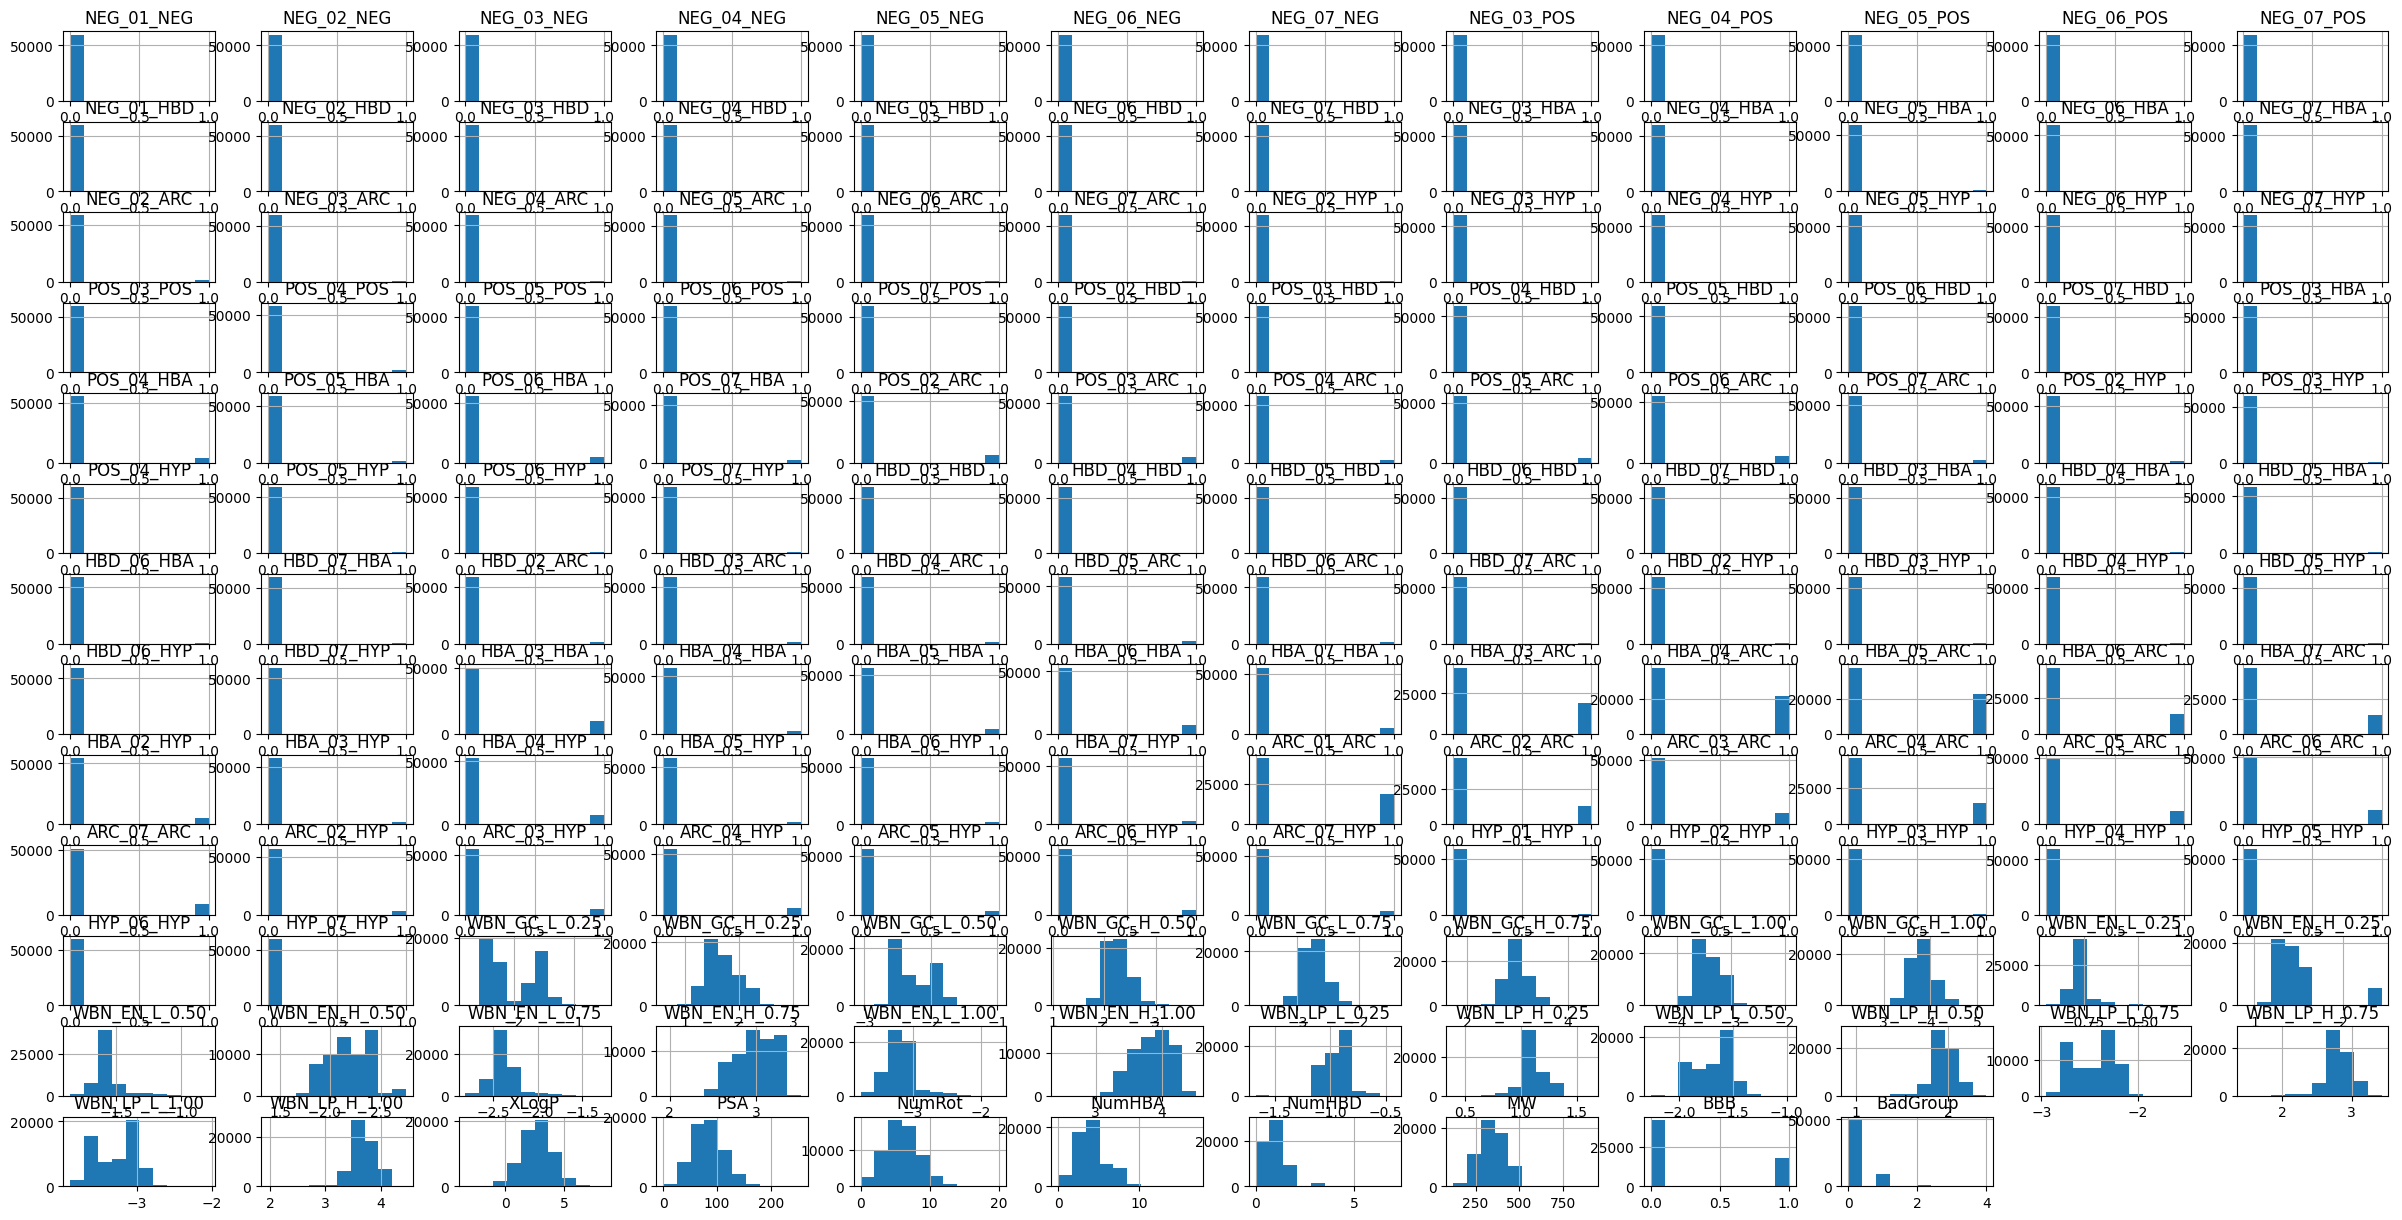

In [29]:
z=df.hist(figsize=(30,15))

In [30]:
# cols = df.sum().sort_values(ascending=False)[-10:]
# df[cols].boxplot(figsize=(20,15))
# plt.show()

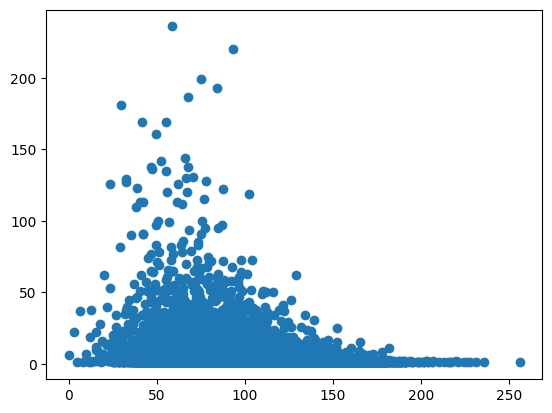

In [31]:
a=df.groupby("PSA").size()
plt.scatter(a.index,a.values)
plt.show()

In [32]:
df.dtypes.sort_values()[-30:]

POS_06_HBD         int64
POS_07_POS         int64
WBN_LP_L_0.50    float64
WBN_LP_H_0.50    float64
WBN_LP_L_0.75    float64
WBN_LP_H_0.75    float64
XLogP            float64
WBN_LP_H_1.00    float64
PSA              float64
WBN_LP_H_0.25    float64
MW               float64
WBN_LP_L_1.00    float64
WBN_LP_L_0.25    float64
WBN_GC_H_0.50    float64
WBN_EN_L_1.00    float64
WBN_EN_H_0.75    float64
WBN_EN_L_0.75    float64
WBN_EN_H_0.50    float64
WBN_EN_L_0.50    float64
WBN_EN_H_0.25    float64
WBN_EN_L_0.25    float64
WBN_GC_H_1.00    float64
WBN_GC_L_1.00    float64
WBN_GC_H_0.75    float64
WBN_GC_L_0.75    float64
WBN_GC_L_0.50    float64
WBN_GC_H_0.25    float64
WBN_GC_L_0.25    float64
WBN_EN_H_1.00    float64
Outcome           object
dtype: object

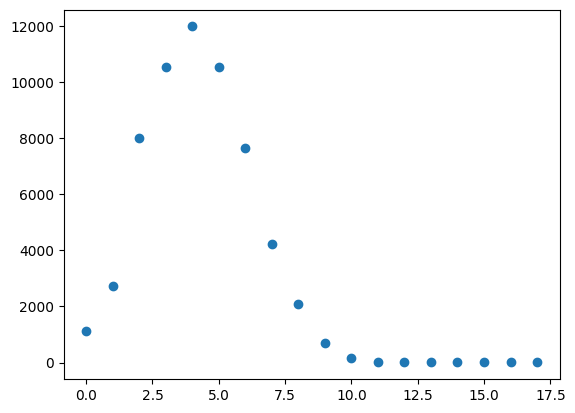

In [33]:
a=df.groupby("NumHBA").size()
plt.scatter(a.index,a.values)
plt.show()

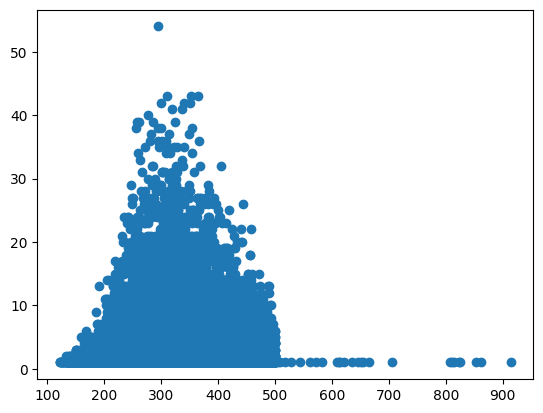

In [34]:
a=df.groupby("MW").size()
plt.scatter(a.index,a.values)
plt.show()

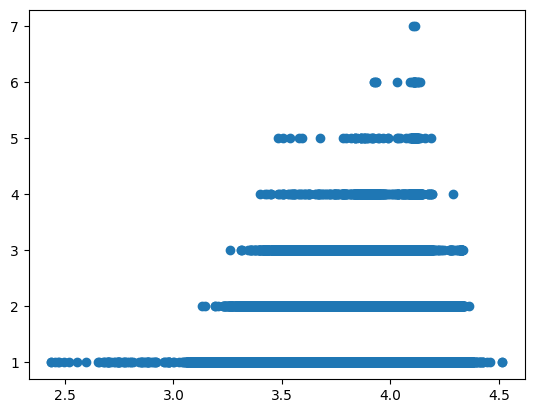

In [35]:
a=df.groupby("WBN_EN_H_1.00").size()
plt.scatter(a.index,a.values)
plt.show()

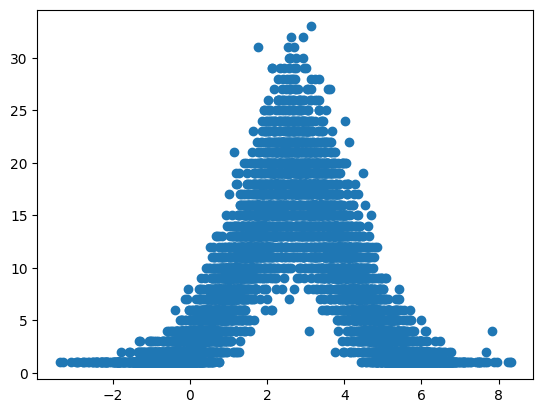

In [36]:
a=df.groupby("XLogP").size()
plt.scatter(a.index,a.values)
plt.show()

In [37]:
X_smote=y_sample.value_counts()
type(X_smote)

pandas.core.series.Series

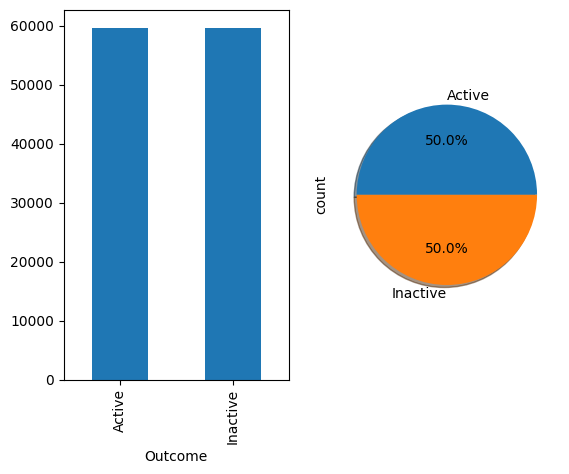

In [38]:
plt.subplot(121)
y_sample.value_counts().plot(kind="bar")
plt.subplot(122)
y_sample.value_counts().plot(kind="pie",autopct='%1.1f%%',shadow=True)
plt.show()

In [39]:
X_sample1=X_sample.copy()
y_sample1=y_sample.copy()

In [40]:
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()
scaling_data=scalar.fit_transform(X_sample1)

In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x1_pca=pca.fit(scaling_data)
x1_pca=pca.transform(scaling_data)
PC_components_none = np.arange(pca.n_components_)
PC_components_none = np.arange(pca.n_components_)

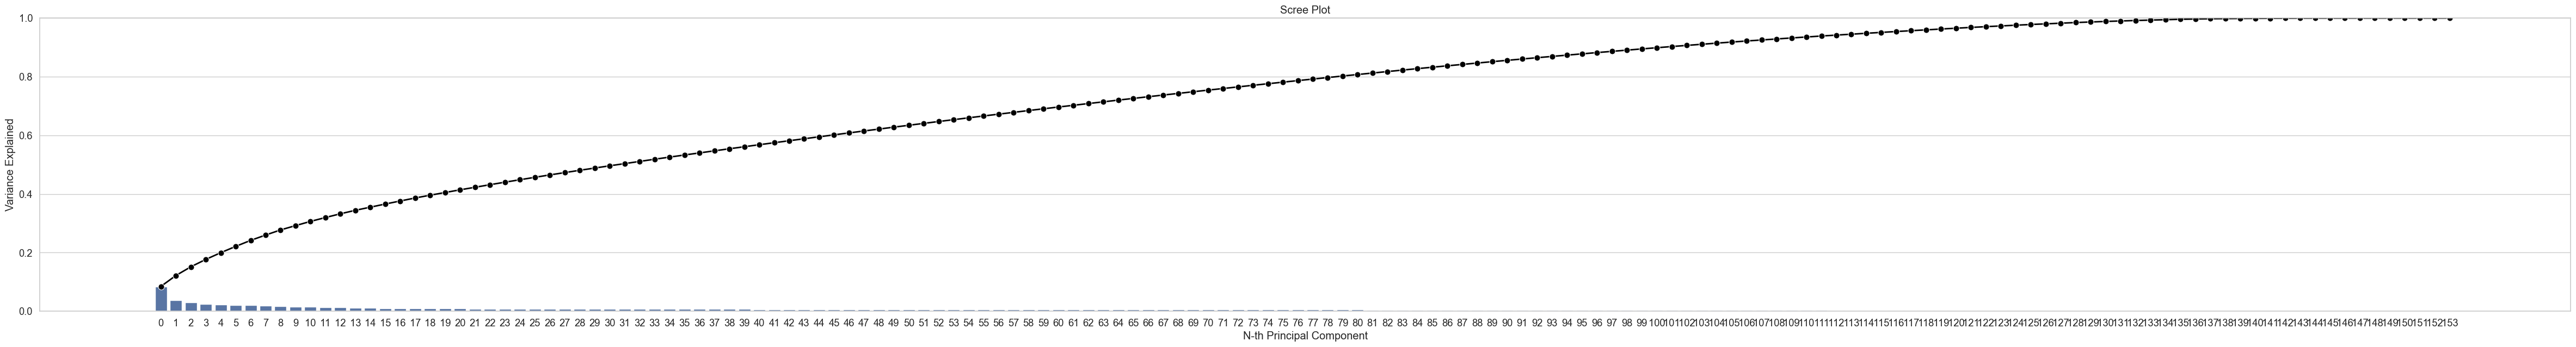

In [42]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(60, 7))
_ = sns.barplot(x=PC_components_none, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components_none, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [43]:
x1_pca.shape

(119454, 154)

In [44]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
x_pca=pca.fit(scaling_data)
x_pca=pca.transform(scaling_data)
PC_components = np.arange(pca.n_components_)
PC_components = np.arange(pca.n_components_)

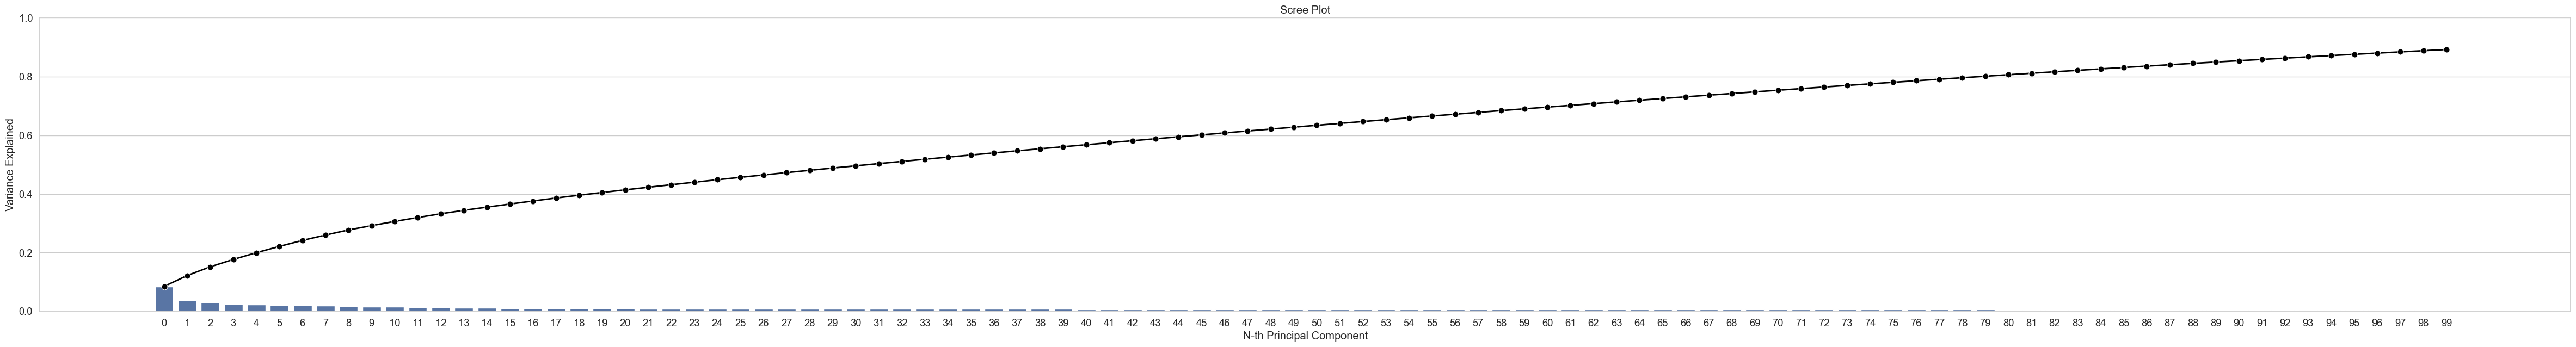

In [45]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(60, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x_pca,y_sample1,test_size=0.20,random_state=0)

In [48]:
X1_train,X1_test,y1_train,y1_test=train_test_split(x1_pca,y_sample1,test_size=0.20,random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [50]:
lr.fit(X_train,y_train)
y_pred_train1=lr.predict(X_train)
y_pred_test1=lr.predict(X_test)

C:\Bioassay_end_to_end_project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
print("accuracy_score",accuracy_score(y_train,y_pred_train1))
print("accuracy_score",accuracy_score(y_test,y_pred_test1))

accuracy_score 0.9368479432416311
accuracy_score 0.9368799966514587


In [52]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

      Active       0.91      0.96      0.94     12032
    Inactive       0.96      0.91      0.93     11859

    accuracy                           0.94     23891
   macro avg       0.94      0.94      0.94     23891
weighted avg       0.94      0.94      0.94     23891



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_test1))

[[11608   424]
 [ 1084 10775]]


In [54]:
lr.fit(X1_train,y1_train)
y1_pred_train=lr.predict(X1_train)
y1_pred_test=lr.predict(X1_test)

C:\Bioassay_end_to_end_project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print("accuracy_score",accuracy_score(y1_train,y1_pred_train))
print("accuracy_score",accuracy_score(y1_test,y1_pred_test))

accuracy_score 0.9608216569174262
accuracy_score 0.961282491314721


In [56]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
x_rf_pca=pca.fit(scaling_data)
x_rf_pca=pca.transform(scaling_data)
PC_components = np.arange(pca.n_components_)
PC_components = np.arange(pca.n_components_)

In [57]:
X2_train,X2_test,y2_train,y2_test=train_test_split(x_rf_pca,y_sample,test_size=0.20,random_state=0)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=5,oob_score=True,random_state=0)
from sklearn.datasets import make_classification

In [59]:
rfc.fit(X2_train,y2_train)
y2_pred_train2=rfc.predict(X2_train)
y2_pred_test2=rfc.predict(X2_test)

In [60]:
print(accuracy_score(y2_train,y2_pred_train2))
print(accuracy_score(y2_test,y2_pred_test2))

0.9656561639965259
0.9670587250429031


In [61]:
print(confusion_matrix(y_test,y2_pred_test2))

[[11954    78]
 [  709 11150]]


In [62]:
print(classification_report(y_test,y2_pred_test2))

              precision    recall  f1-score   support

      Active       0.94      0.99      0.97     12032
    Inactive       0.99      0.94      0.97     11859

    accuracy                           0.97     23891
   macro avg       0.97      0.97      0.97     23891
weighted avg       0.97      0.97      0.97     23891



In [63]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x_pca=pca.fit(scaling_data)
x_pca=pca.transform(scaling_data)
PC_components = np.arange(pca.n_components_)
PC_components = np.arange(pca.n_components_)

In [64]:
X2_train,X2_test,y2_train,y2_test=train_test_split(x_pca,y_sample,test_size=0.20,random_state=0)

In [65]:
rfc.fit(X2_train,y2_train)
y2_pred_train2=rfc.predict(X2_train)
y2_pred_test2=rfc.predict(X2_test)

In [66]:
print(accuracy_score(y2_train,y2_pred_train2))
print(accuracy_score(y2_test,y2_pred_test2))

0.9691512405428879
0.9689004227533381


In [67]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_train3=dt.predict(X_train)
y_pred_test3=dt.predict(X_test)

In [68]:
print(accuracy_score(y_train,y_pred_train3))
print(accuracy_score(y_test,y_pred_test3))

1.0
0.9965677451760077


In [69]:
print(confusion_matrix(y_test,y_pred_test3))

[[12015    17]
 [   65 11794]]


In [70]:
print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

      Active       0.99      1.00      1.00     12032
    Inactive       1.00      0.99      1.00     11859

    accuracy                           1.00     23891
   macro avg       1.00      1.00      1.00     23891
weighted avg       1.00      1.00      1.00     23891



In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100,max_depth=5,oob_score=True,random_state=0)

In [72]:
rfc.fit(X_train,y_train)
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

In [73]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9654991994809706
0.9657193085262232


In [74]:
rfc.fit(X1_train,y1_train)
y1_pred_train=rfc.predict(X1_train)
y1_pred_test=rfc.predict(X1_test)

In [75]:
print(accuracy_score(y1_train,y1_pred_train))
print(accuracy_score(y1_test,y1_pred_test))

0.9691512405428879
0.9689004227533381


In [76]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C=.4, kernel='linear', gamma=2)
svc_model.fit(X_train, y_train)

SVC(C=0.4, gamma=2, kernel='linear')

In [77]:
y_pred_train4= svc_model.predict(X_train)
y_pred_test4=svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.9386478030199973
0.9382612699342848


In [78]:
print(confusion_matrix(y_test,y_pred_test4))

[[11662   370]
 [ 1105 10754]]


In [79]:
print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

      Active       0.91      0.97      0.94     12032
    Inactive       0.97      0.91      0.94     11859

    accuracy                           0.94     23891
   macro avg       0.94      0.94      0.94     23891
weighted avg       0.94      0.94      0.94     23891



In [80]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=20)
clf.fit(X_train,y_train)

AdaBoostClassifier(random_state=20)

In [81]:
y_pred_train5=clf.predict(X_train)
y_pred_test5=clf.predict(X_test)

In [82]:
clf.score(X_test,y_test)

0.9691515633502156

In [83]:
clf.score(X_train,y_train)

0.9710662076326612

In [84]:
print(confusion_matrix(y_test,y_pred_test5))

[[11783   249]
 [  488 11371]]


In [85]:
print(classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

      Active       0.96      0.98      0.97     12032
    Inactive       0.98      0.96      0.97     11859

    accuracy                           0.97     23891
   macro avg       0.97      0.97      0.97     23891
weighted avg       0.97      0.97      0.97     23891



In [86]:
residuals = y_train.values-y2_pred_train2
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="WBN_LP_H_1.00", y="Outcome")
fig.show()